Importing libraries

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [441]:
date_fruit=pd.read_excel("Date_Fruit_Datasets.xlsx")

In [442]:
date_fruit.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLdaub4RG  \
0      4.2287 -59191263232 -50714214400 -39922372608     58.7255     54.9554   
1      3.1704 -34233065472 -37462601728 -31477794816     50.0259     52.8168   
2      4.7192 -93948354560 -74738221056 -60311207936     65.4772     59.2860   
3      8.2618 -32074307584 -32060925952 -29575010304     43.3900     44.1259   
4      4.4146 -39980974080 -35980042240 -25593278464     52.7743     50.9080   

   ALLdaub4RB  Class  
0     47.8400  BERHI  
1     47.8315  BERHI  
2     51.9378  BERHI  
3     41.1882  BERHI  
4     42.6666  BERHI  

[5 rows x 35 columns]

In [443]:
date_fruit.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [444]:
date_fruit.shape

(898, 35)

In [445]:
date_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [446]:
date_fruit.Class.unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [447]:
date_fruit.isna().sum().to_frame()

0
AREA           0
PERIMETER      0
MAJOR_AXIS     0
MINOR_AXIS     0
ECCENTRICITY   0
EQDIASQ        0
SOLIDITY       0
CONVEX_AREA    0
EXTENT         0
ASPECT_RATIO   0
ROUNDNESS      0
COMPACTNESS    0
SHAPEFACTOR_1  0
SHAPEFACTOR_2  0
SHAPEFACTOR_3  0
SHAPEFACTOR_4  0
MeanRR         0
MeanRG         0
MeanRB         0
StdDevRR       0
StdDevRG       0
StdDevRB       0
SkewRR         0
SkewRG         0
SkewRB         0
KurtosisRR     0
KurtosisRG     0
KurtosisRB     0
EntropyRR      0
EntropyRG      0
EntropyRB      0
ALLdaub4RR     0
ALLdaub4RG     0
ALLdaub4RB     0
Class          0

In [448]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
date_fruit["Class"]=encoder.fit_transform(date_fruit["Class"])

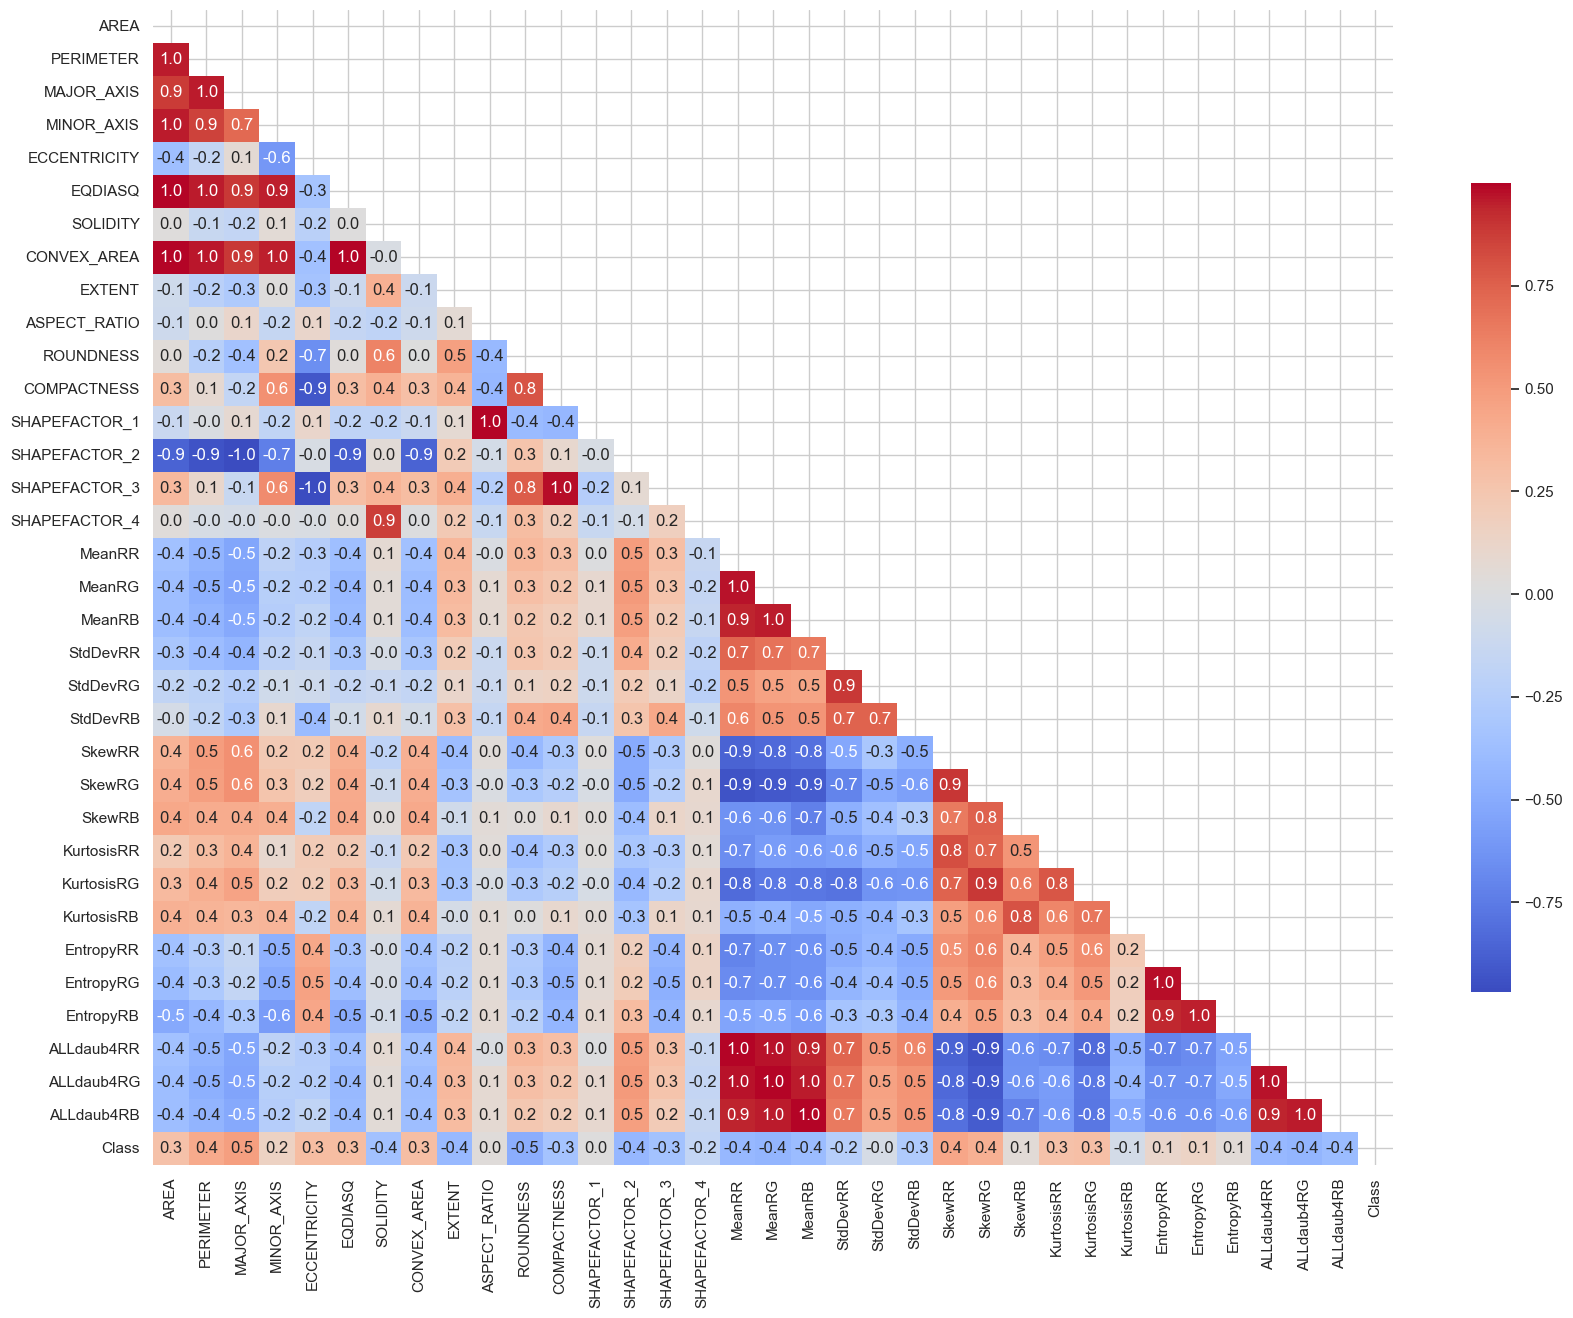

In [449]:
corr=date_fruit.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'shrink': .7})

plt.show()

In [450]:
date_fruit.describe().T

count          mean           std           min           25%  \
AREA           898.0  2.982952e+05  1.072452e+05  1.987000e+03  2.069480e+05   
PERIMETER      898.0  2.057661e+03  4.100125e+02  9.118280e+02  1.726091e+03   
MAJOR_AXIS     898.0  7.508120e+02  1.440593e+02  3.367227e+02  6.410686e+02   
MINOR_AXIS     898.0  4.958728e+02  1.142689e+02  2.283200e+00  4.046844e+02   
ECCENTRICITY   898.0  7.374678e-01  8.872739e-02  3.448000e-01  6.856250e-01   
EQDIASQ        898.0  6.045779e+02  1.195939e+02  5.029840e+01  5.133171e+02   
SOLIDITY       898.0  9.818403e-01  1.815742e-02  8.366000e-01  9.788250e-01   
CONVEX_AREA    898.0  3.038456e+05  1.088157e+05  2.257000e+03  2.100228e+05   
EXTENT         898.0  7.362671e-01  5.374518e-02  5.123000e-01  7.058750e-01   
ASPECT_RATIO   898.0  2.131102e+00  1.782078e+01  1.065300e+00  1.373725e+00   
ROUNDNESS      898.0  8.577200e-01  7.083882e-02  4.800000e-03  8.277500e-01   
COMPACTNESS    898.0  8.071903e-01  6.217535e-02  4.110000e-02  7.680500e-01   
SHAPEFACTOR_1  898.0  3.428396e-03  2.045601e-02  1.700000e-03  2.200000e-03   
SHAPEFACTOR_2  898.0  1.794432e-03  4.279168e-04  1.100000e-03  1.500000e-03   
SHAPEFACTOR_3  898.0  6.554197e-01  9.431447e-02  1.700000e-03  5.899750e-01   
SHAPEFACTOR_4  898.0  9.886796e-01  2.047314e-02  7.568000e-01  9.893000e-01   
MeanRR         898.0  1.001659e+02  3.212655e+01  3.038260e+01  7.644800e+01   
MeanRG         898.0  9.760940e+01  2.825180e+01  4.104800e+01  7.730613e+01   
MeanRB         898.0  9.619489e+01  2.162741e+01  4.425690e+01  7.850238e+01   
StdDevRR       898.0  2.904744e+01  6.306931e+00  7.303800e+00  2.490152e+01   
StdDevRG       898.0  2.638336e+01  5.462164e+00  8.655700e+00  2.228965e+01   
StdDevRB       898.0  2.614833e+01  4.905078e+00  5.148600e+00  2.289098e+01   
SkewRR         898.0  8.926615e-02  9.432854e-01 -1.724200e+00 -5.499000e-01   
SkewRG         898.0  5.641388e-01  1.039813e+00 -1.834400e+00 -2.302000e-01   
SkewRB         898.0  2.505179e-01  6.329178e-01 -1.029100e+00 -1.969500e-01   
KurtosisRR     898.0  4.247845e+00  2.892357e+00  1.708200e+00  2.536625e+00   
KurtosisRG     898.0  5.110894e+00  3.745463e+00  1.607600e+00  2.508850e+00   
KurtosisRB     898.0  3.780928e+00  2.049831e+00  1.767200e+00  2.577275e+00   
EntropyRR      898.0 -3.185021e+10  2.037241e+10 -1.091224e+11 -4.429444e+10   
EntropyRG      898.0 -2.901860e+10  1.712952e+10 -9.261697e+10 -3.894638e+10   
EntropyRB      898.0 -2.771876e+10  1.484137e+10 -8.747177e+10 -3.564534e+10   
ALLdaub4RR     898.0  5.008289e+01  1.606313e+01  1.519110e+01  3.822442e+01   
ALLdaub4RG     898.0  4.880568e+01  1.412591e+01  2.052470e+01  3.865452e+01   
ALLdaub4RB     898.0  4.809839e+01  1.081386e+01  2.213000e+01  3.925073e+01   
Class          898.0  3.279510e+00  1.803886e+00  0.000000e+00  2.000000e+00   

                        50%           75%           max  
AREA           3.198330e+05  3.825730e+05  5.460630e+05  
PERIMETER      2.196345e+03  2.389717e+03  2.811997e+03  
MAJOR_AXIS     7.913634e+02  8.586338e+02  1.222723e+03  
MINOR_AXIS     4.950548e+02  5.890317e+02  7.664536e+02  
ECCENTRICITY   7.547000e-01  8.021500e-01  1.000000e+00  
EQDIASQ        6.381409e+02  6.979305e+02  8.338279e+02  
SOLIDITY       9.873000e-01  9.918000e-01  9.974000e-01  
CONVEX_AREA    3.272070e+05  3.888040e+05  5.525980e+05  
EXTENT         7.469500e-01  7.758500e-01  8.562000e-01  
ASPECT_RATIO   1.524150e+00  1.674750e+00  5.355257e+02  
ROUNDNESS      8.677500e-01  8.995000e-01  9.773000e-01  
COMPACTNESS    8.049500e-01  8.488750e-01  9.681000e-01  
SHAPEFACTOR_1  2.600000e-03  3.200000e-03  6.154000e-01  
SHAPEFACTOR_2  1.600000e-03  2.075000e-03  4.300000e-03  
SHAPEFACTOR_3  6.479500e-01  7.206250e-01  9.373000e-01  
SHAPEFACTOR_4  9.936000e-01  9.964000e-01  9.995000e-01  
MeanRR         1.076825e+02  1.261275e+02  1.596494e+02  
MeanRG         1.006760e+02  1.191596e+02  1.661354e+02  
MeanRB         9.922560e+01  1.1

Area:-Accoridng to this description area has wide range 1987 to 5460630 ,this indicate standrad deviation is high.

In [451]:
mean_area = date_fruit['AREA'].mean()
median_area = date_fruit['AREA'].median()

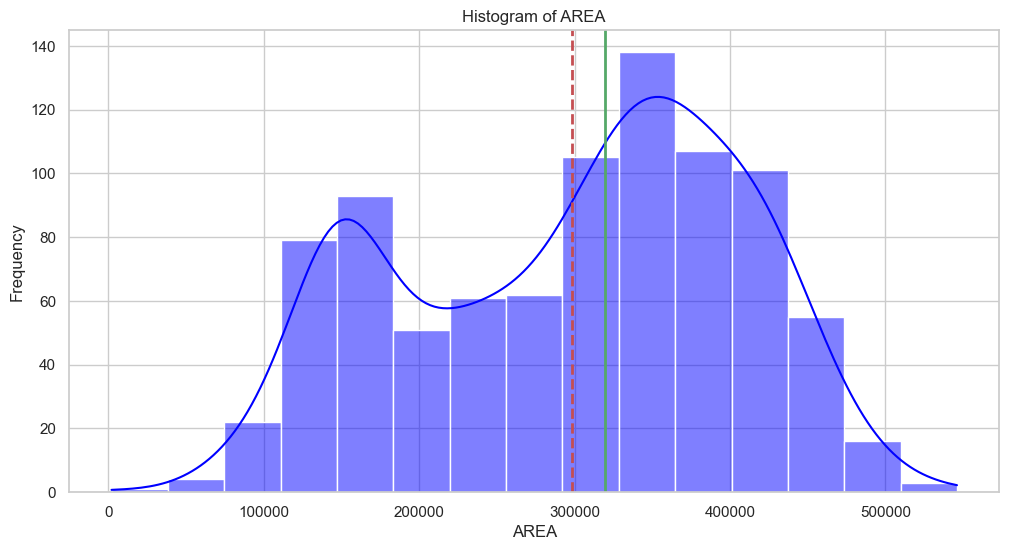

In [452]:

plt.figure(figsize=(12, 6))
sns.histplot(date_fruit['AREA'], kde=True, color='blue')
plt.title('Histogram of AREA')
plt.xlabel('AREA')
plt.ylabel('Frequency')
plt.axvline(mean_area, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_area:.2f}')
plt.axvline(median_area, color='g', linestyle='-', linewidth=2, label=f'Median: {median_area:.2f}')
plt.show()

Here mean < median so it is left-skewed distribution.


2.Shape Descriptor:-
1.ECCENTRICITY:- Has mean of 0.737, indicating generally elongated shapes.It means it has greater frequency in between 0.7 to 0.8 range

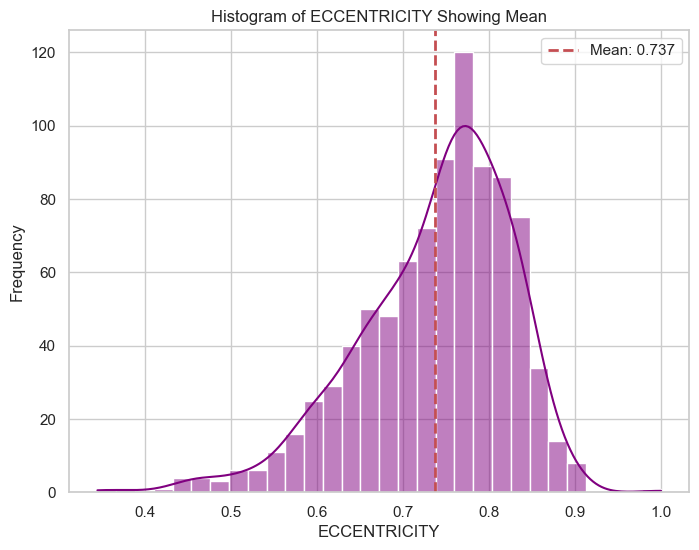

In [453]:
plt.figure(figsize=(8, 6))
sns.histplot(date_fruit['ECCENTRICITY'], kde=True, color='purple', bins=30)
plt.title('Histogram of ECCENTRICITY Showing Mean')
plt.xlabel('ECCENTRICITY')
plt.ylabel('Frequency')
mean_eccentricity = date_fruit['ECCENTRICITY'].mean()
plt.axvline(mean_eccentricity, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_eccentricity:.3f}')

plt.legend()

plt.show()

2.Shape Descriptor:-
2.ASPECT RATIO:- high maximum value of 535.5257 for the ASPECT_RATIO Feature suggests the presence of outliers or errors in the data. An aspect ratio measures the ratio of an object's width to its height, and such a high value is highly unusual, especially when compared to the values within the 75th percentile, which is only 1.67475.

3.SKewness & Kurtosis

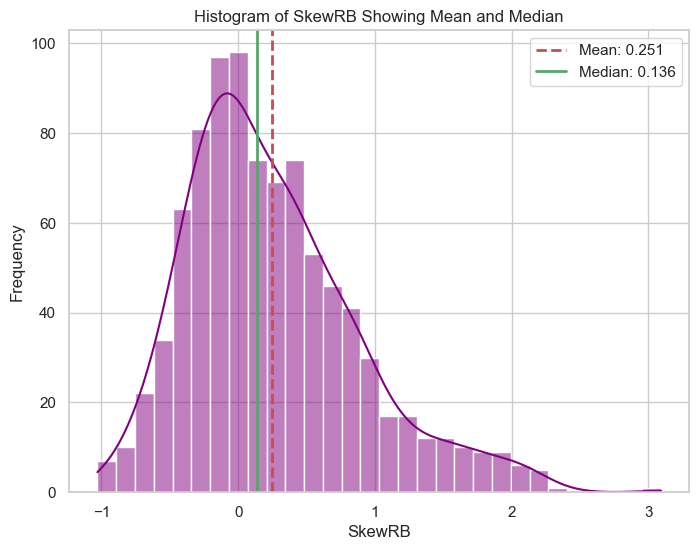

In [454]:
plt.figure(figsize=(8, 6))
sns.histplot(date_fruit['SkewRB'], kde=True, color='purple', bins=30)
plt.title('Histogram of SkewRB Showing Mean and Median')
plt.xlabel('SkewRB')
plt.ylabel('Frequency')
mean_skewRB = date_fruit['SkewRB'].mean()
median_skewRB = date_fruit['SkewRB'].median()
plt.axvline(mean_skewRB, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_skewRB:.3f}')
plt.axvline(median_skewRB, color='g', linestyle='-', linewidth=2, label=f'Median: {median_skewRB:.3f}')
plt.legend()

plt.show()

SKewRB is right or positive skewed

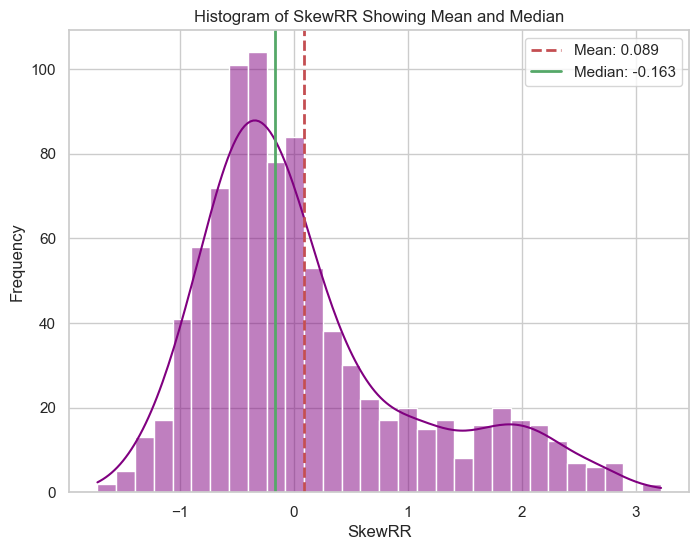

In [455]:
plt.figure(figsize=(8, 6))
sns.histplot(date_fruit['SkewRR'], kde=True, color='purple', bins=30)
plt.title('Histogram of SkewRR Showing Mean and Median')
plt.xlabel('SkewRR')
plt.ylabel('Frequency')
mean_skewRR = date_fruit['SkewRR'].mean()
median_skewRR = date_fruit['SkewRR'].median()
plt.axvline(mean_skewRR, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_skewRR:.3f}')
plt.axvline(median_skewRR, color='g', linestyle='-', linewidth=2, label=f'Median: {median_skewRR:.3f}')
plt.legend()

plt.show()

skewrr is also positive skewed

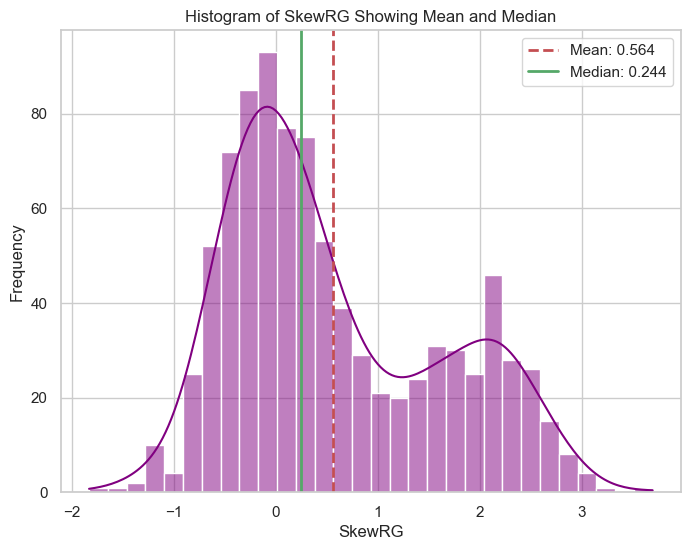

In [456]:
plt.figure(figsize=(8, 6))
sns.histplot(date_fruit['SkewRG'], kde=True, color='purple', bins=30)
plt.title('Histogram of SkewRG Showing Mean and Median')
plt.xlabel('SkewRG')
plt.ylabel('Frequency')
mean_skewRG = date_fruit['SkewRG'].mean()
median_skewRG = date_fruit['SkewRG'].median()
plt.axvline(mean_skewRG, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_skewRG:.3f}')
plt.axvline(median_skewRG, color='g', linestyle='-', linewidth=2, label=f'Median: {median_skewRG:.3f}')
plt.legend()

plt.show()

skewRG is too positive skewed

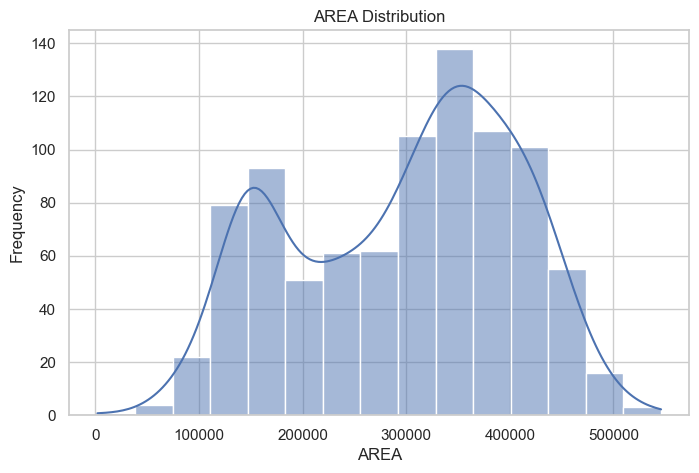

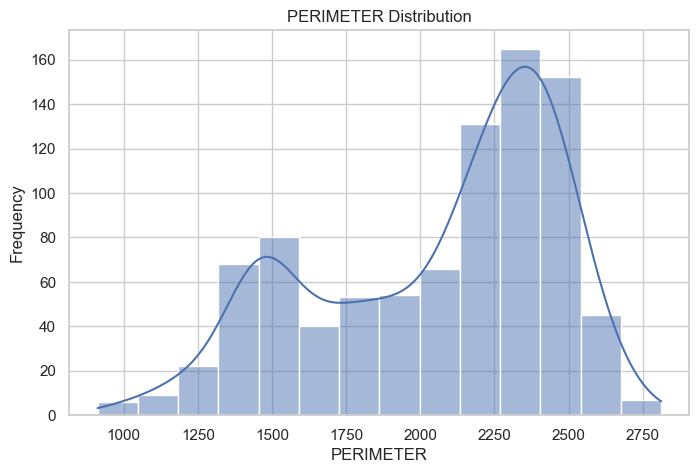

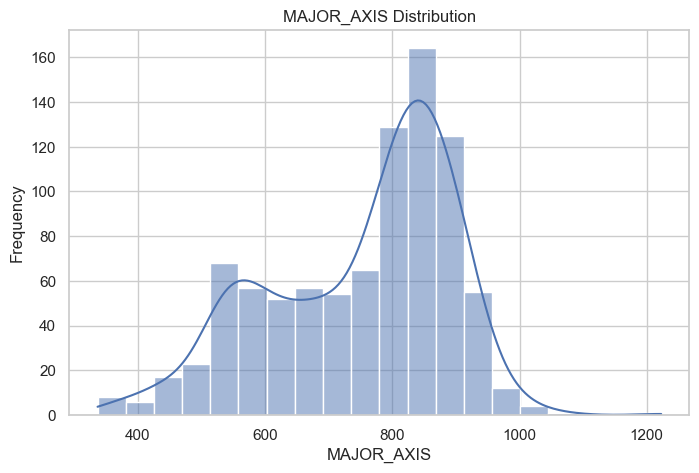

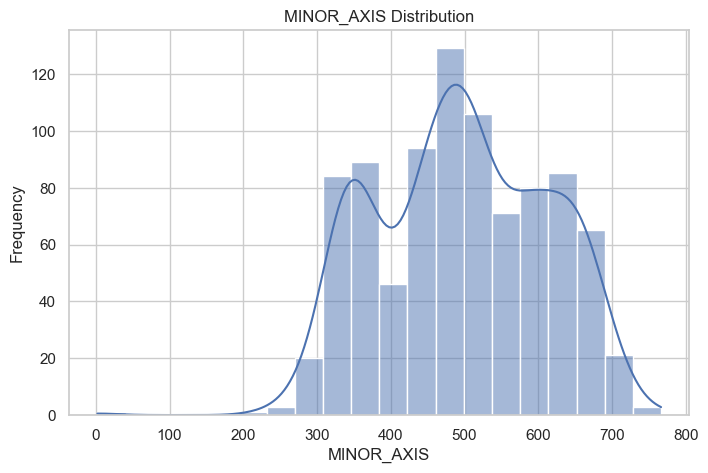

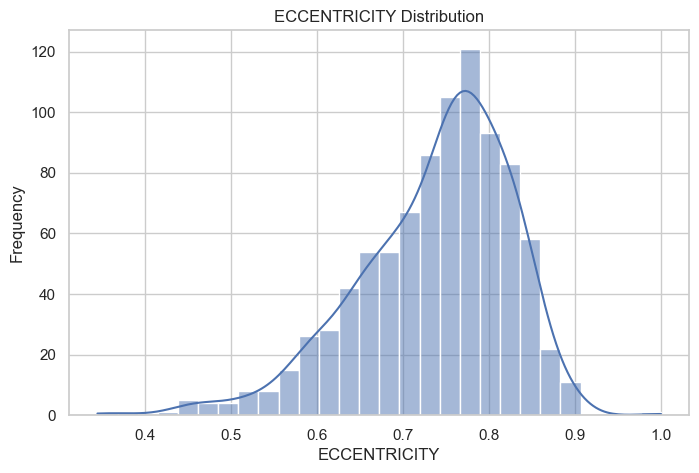

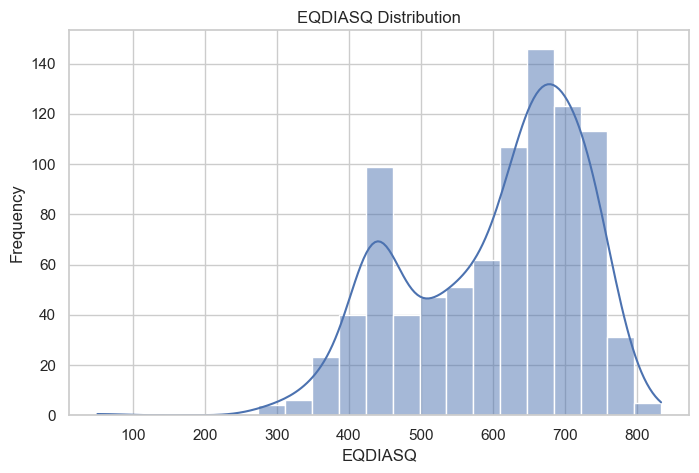

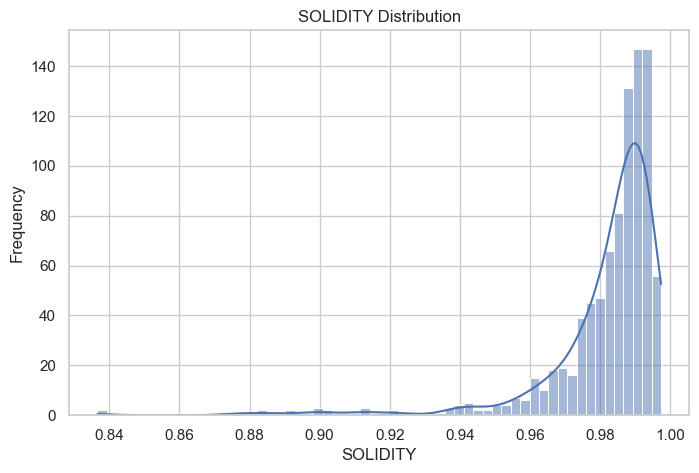

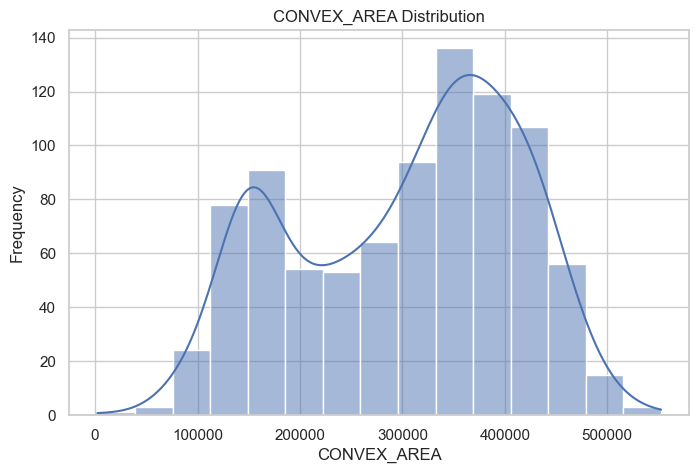

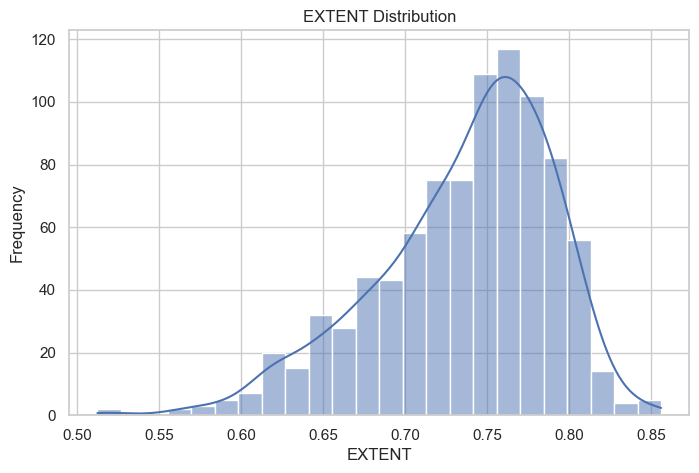

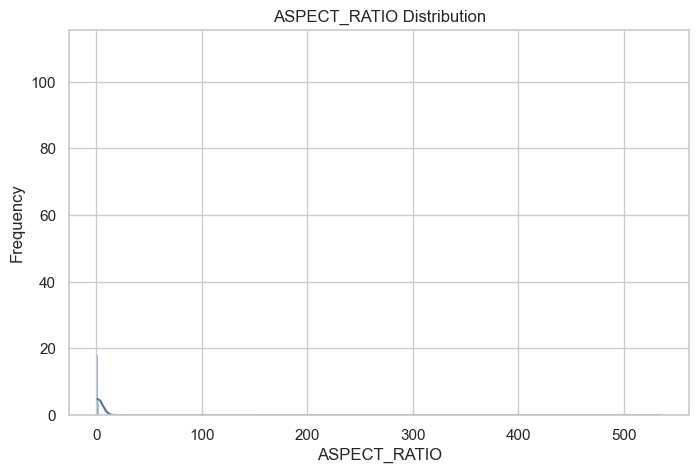

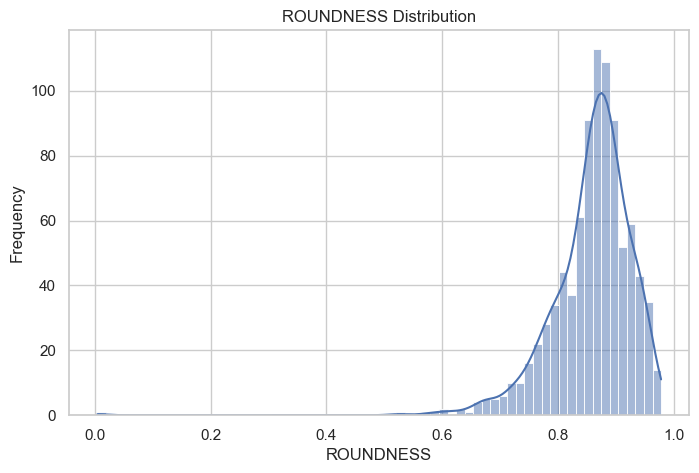

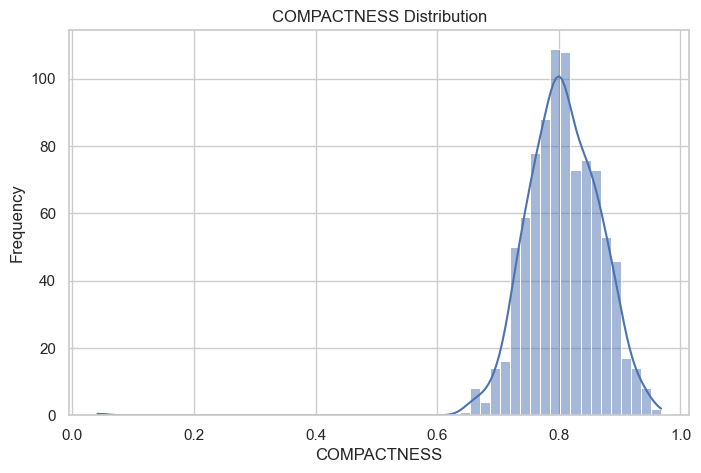

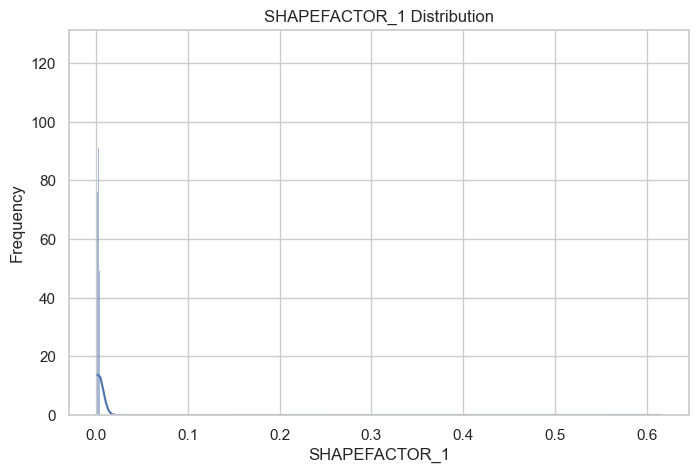

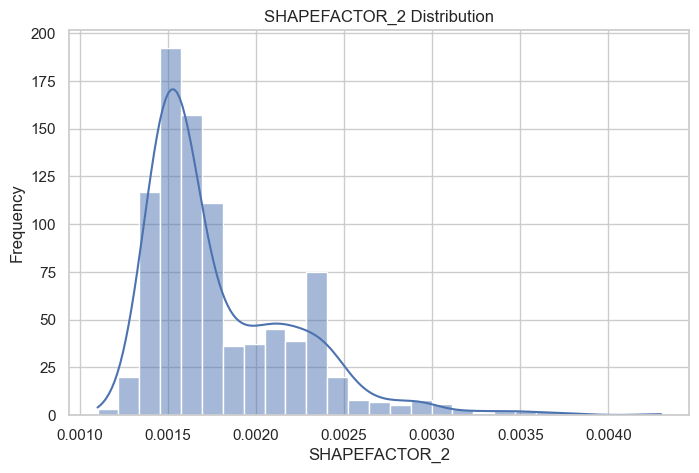

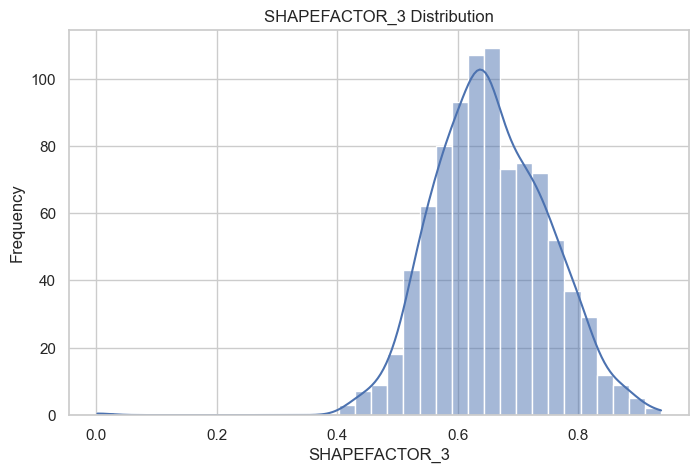

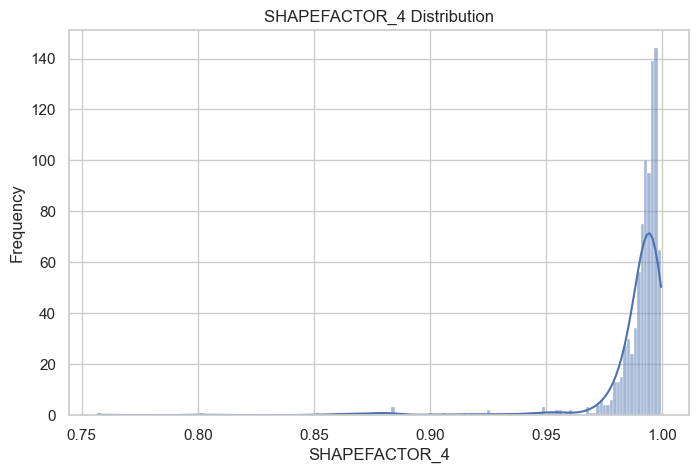

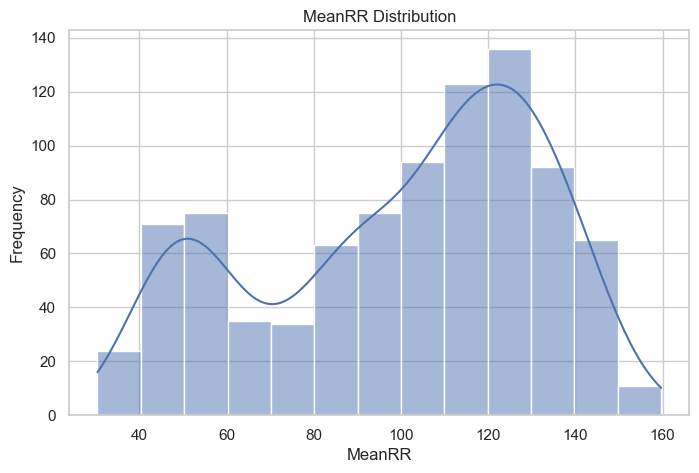

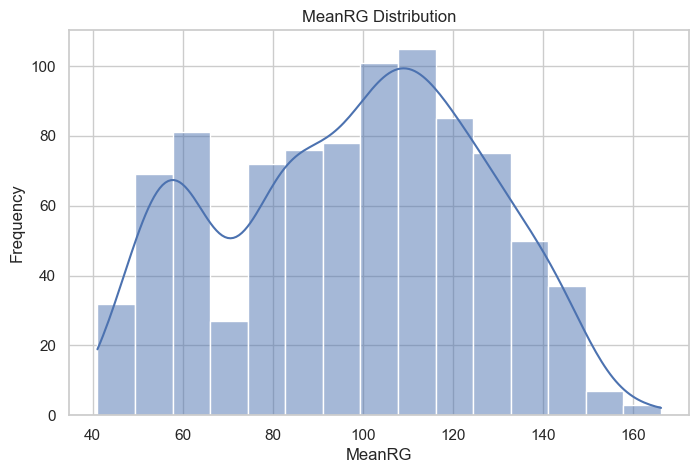

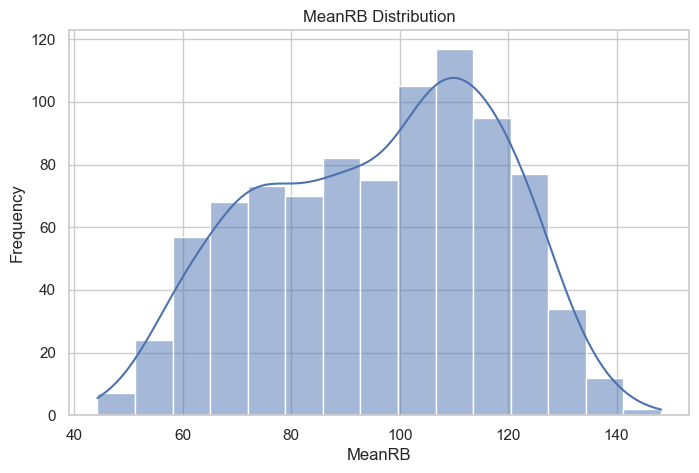

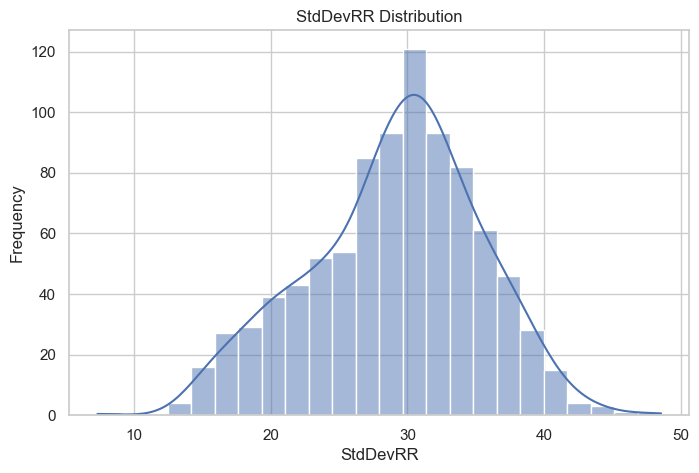

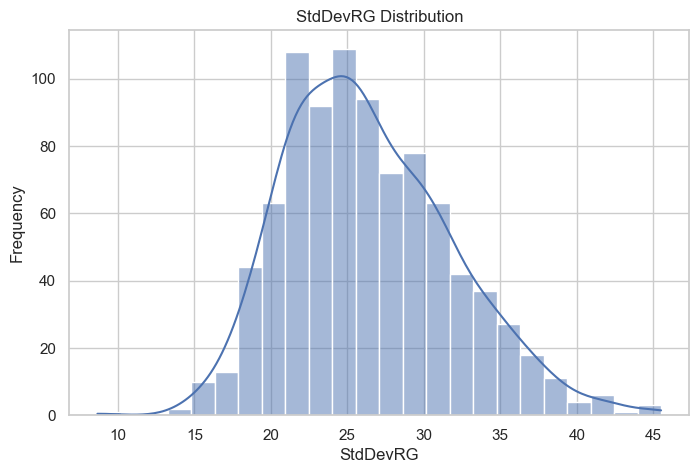

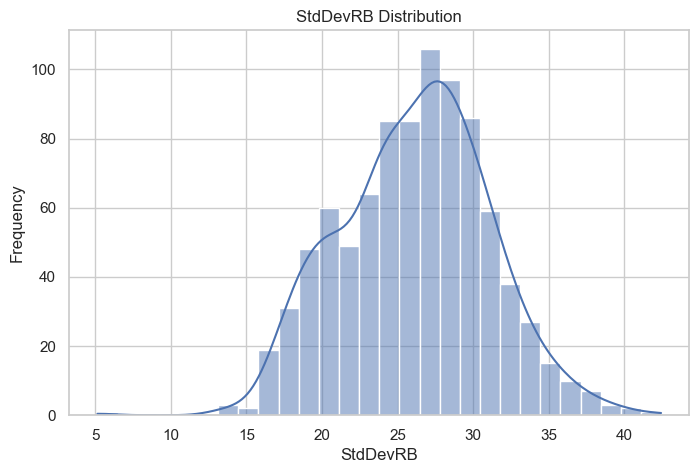

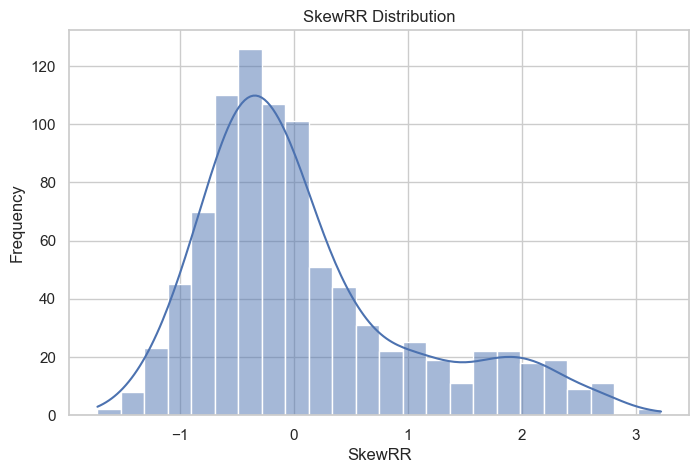

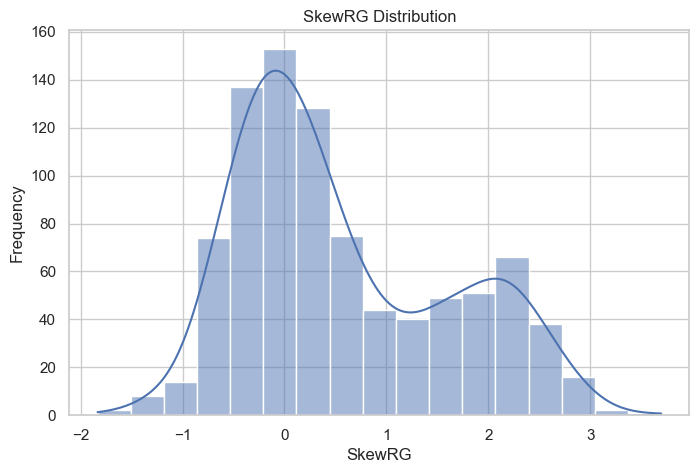

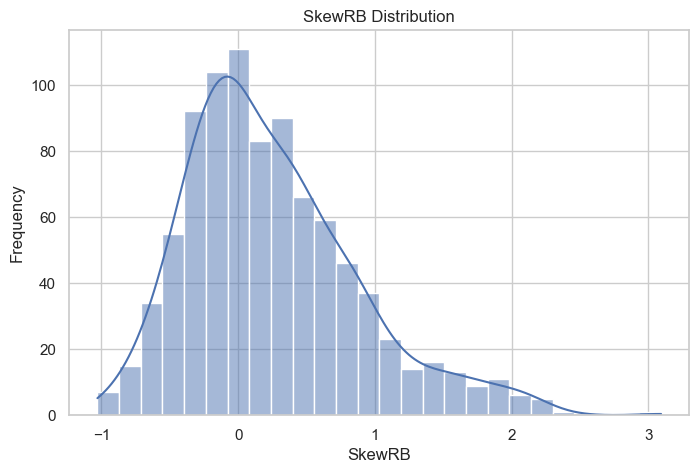

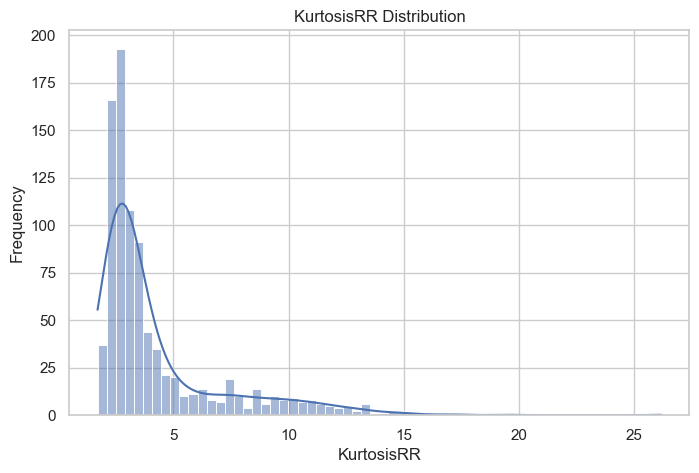

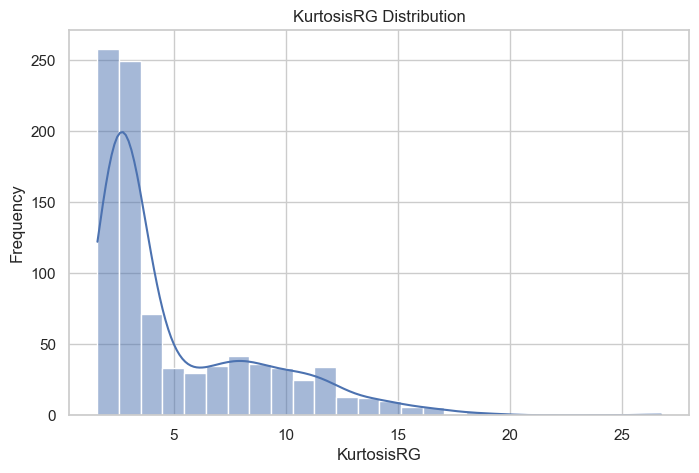

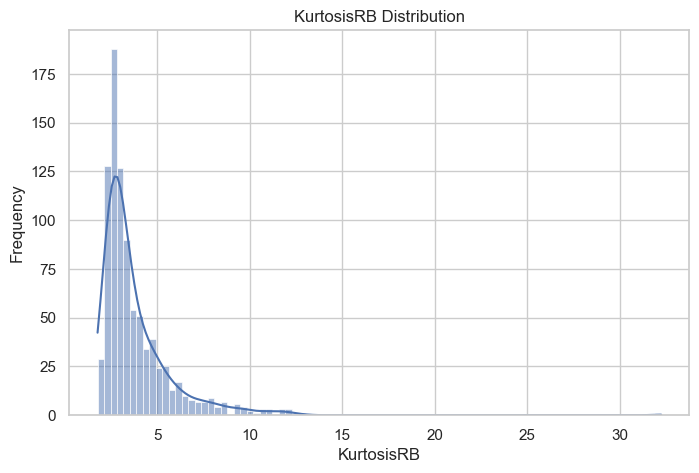

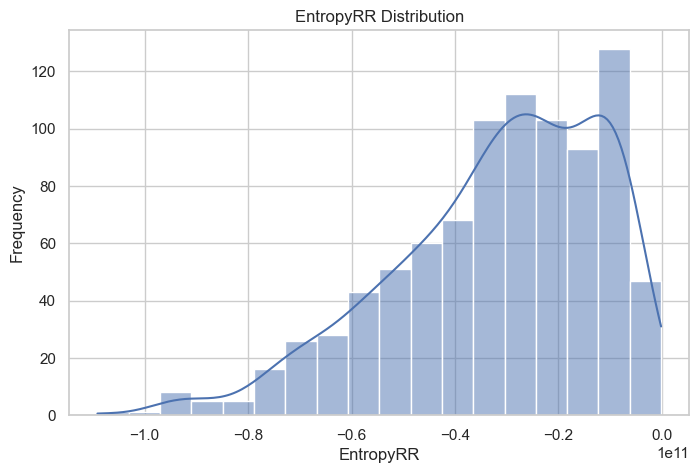

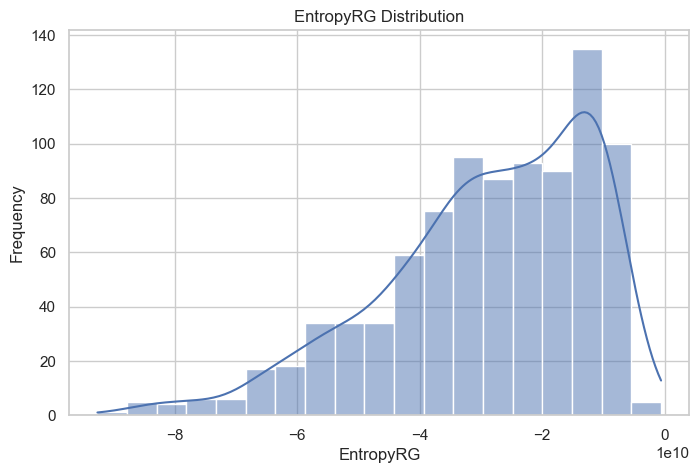

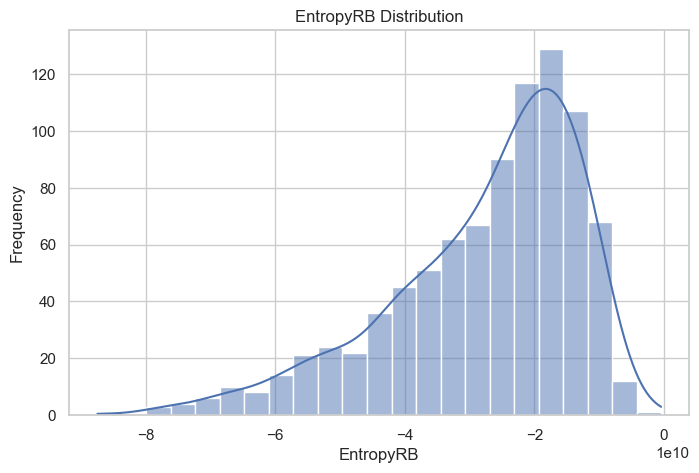

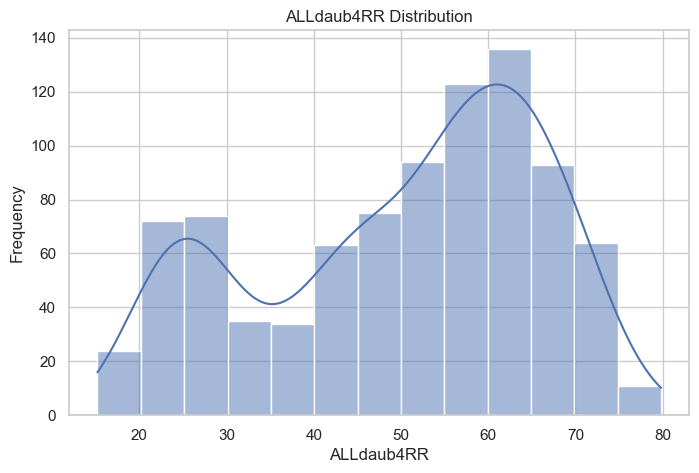

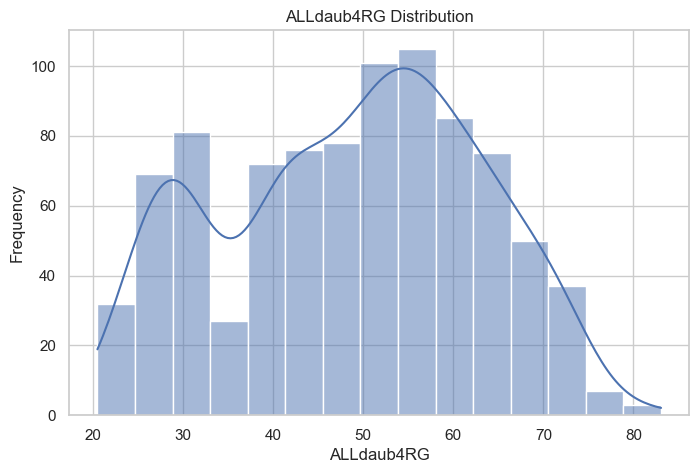

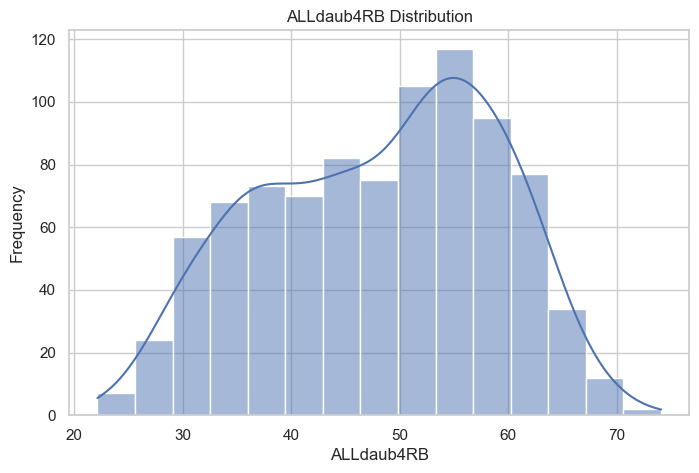

In [457]:
def draw_distribution(feature, column):
    plt.figure(figsize=(8, 5))
    plt.title(f'{column} Distribution')
    sns.histplot(feature, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
for column in date_fruit.columns[:-1]:
  draw_distribution(date_fruit[column].to_numpy(), column)

IN this dataset none of the value is normly distributed
distributions experience outliers: extreme values on one or both sides.

lets have a look over feature with respect to target

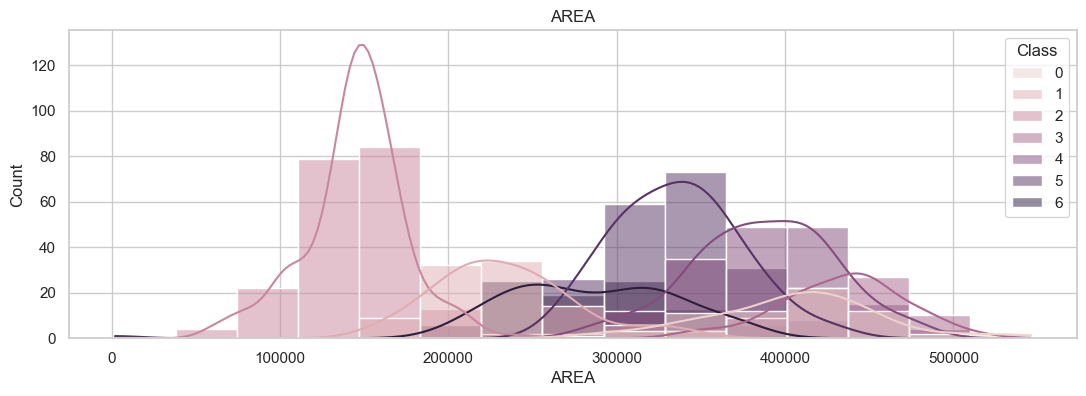

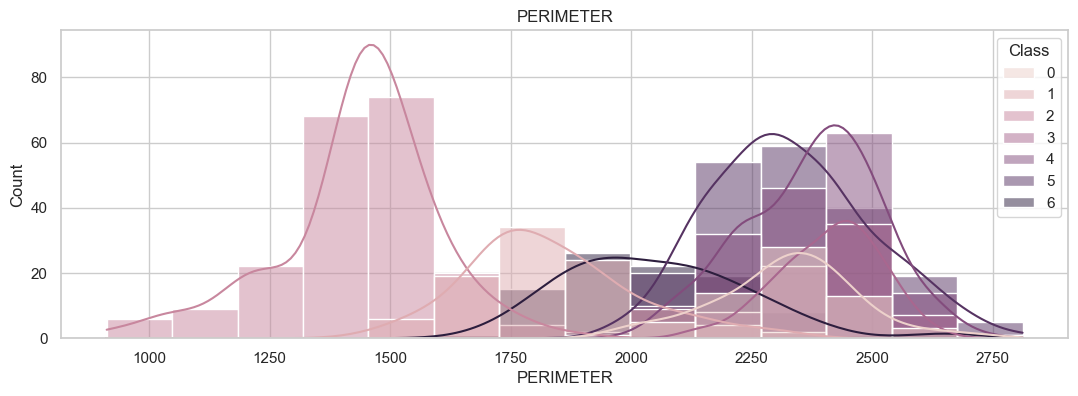

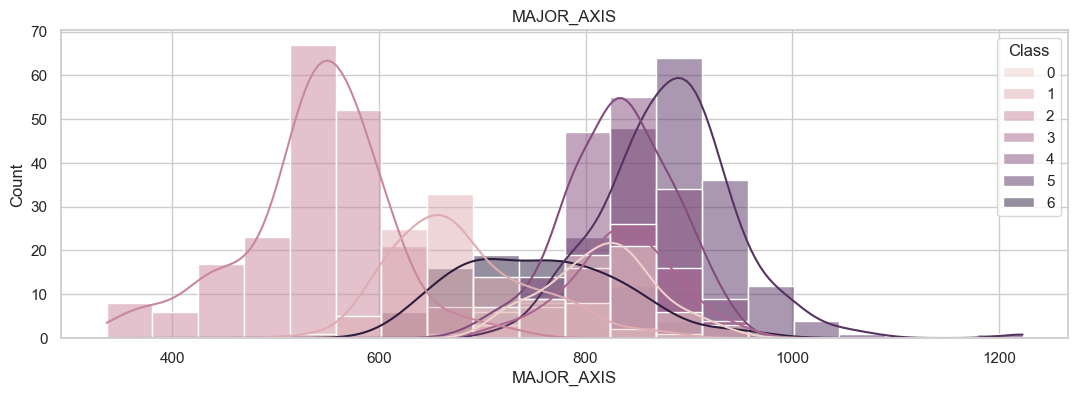

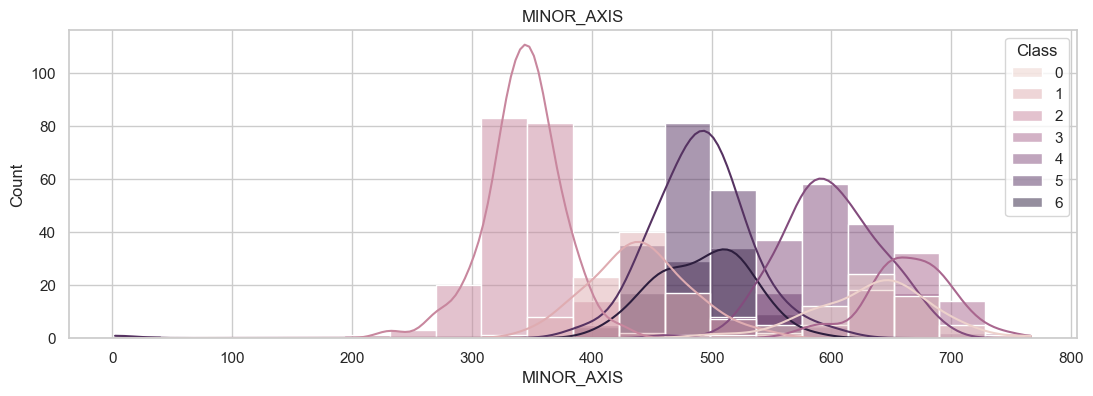

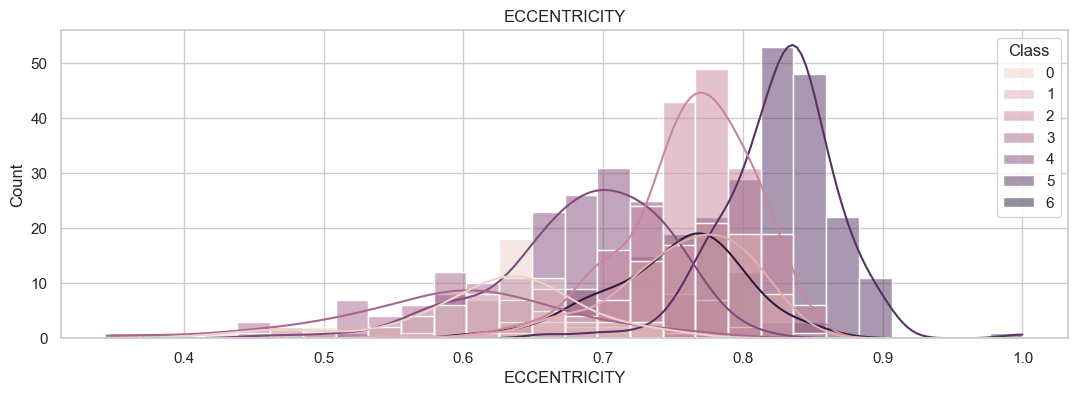

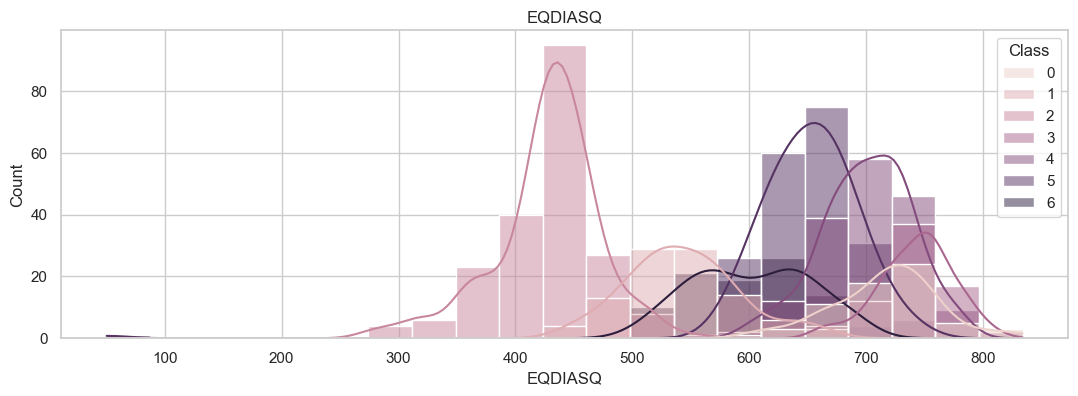

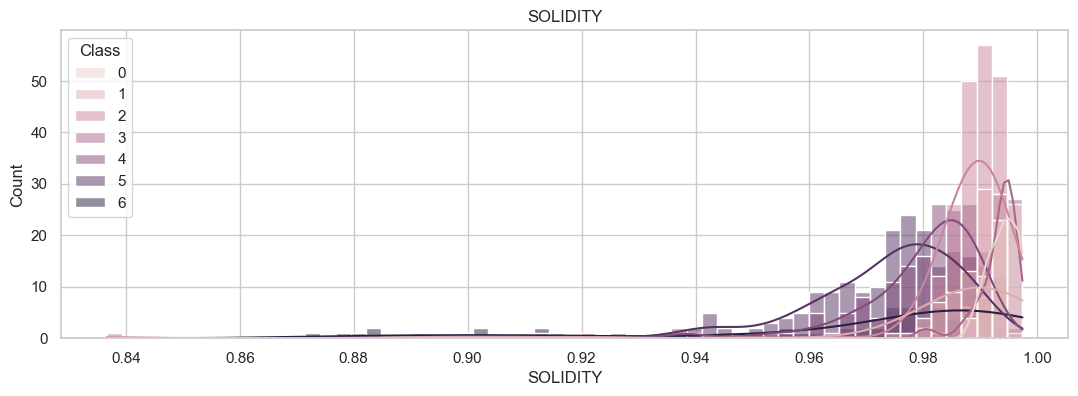

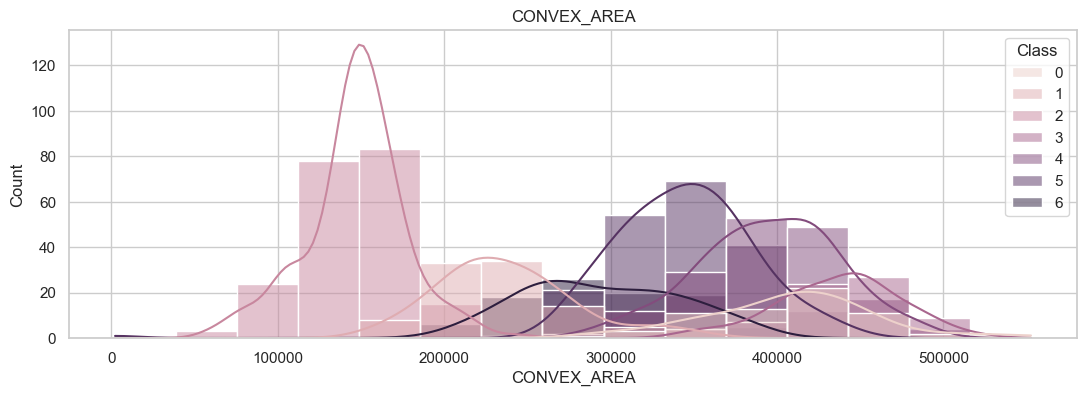

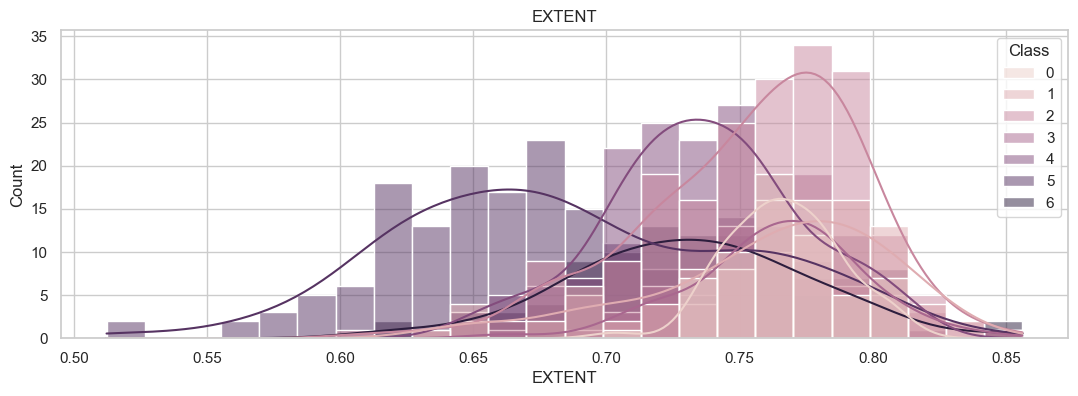

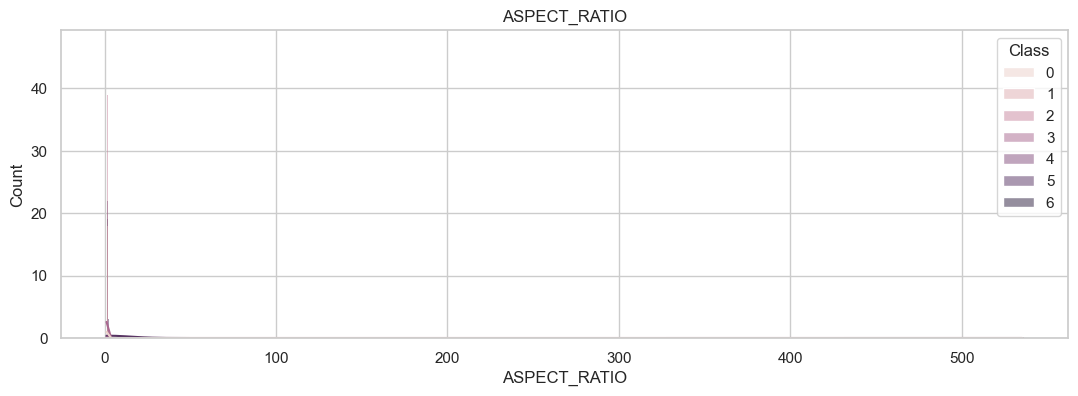

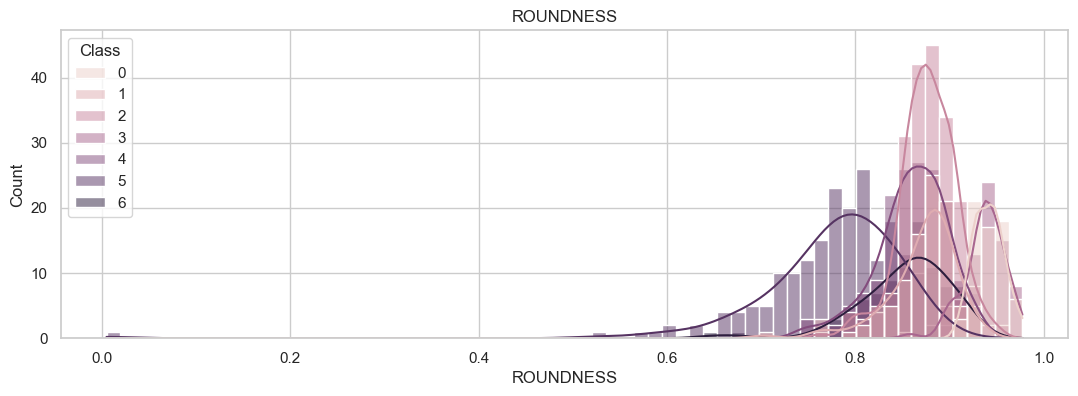

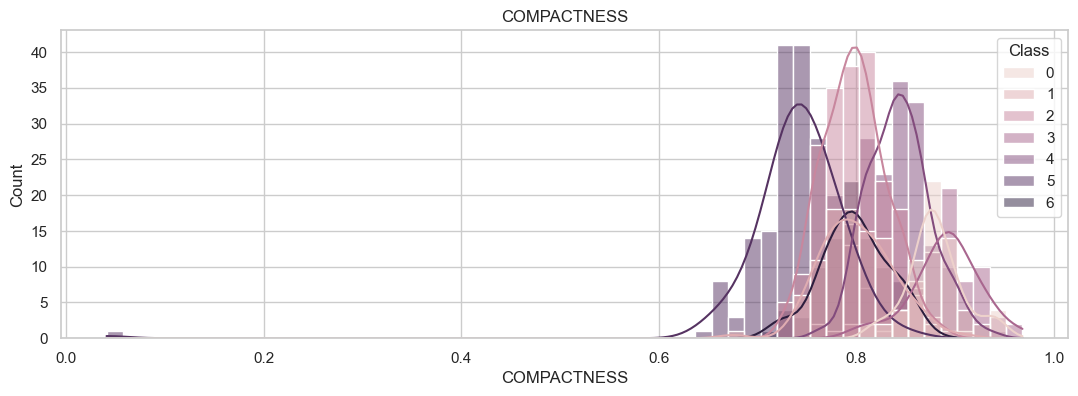

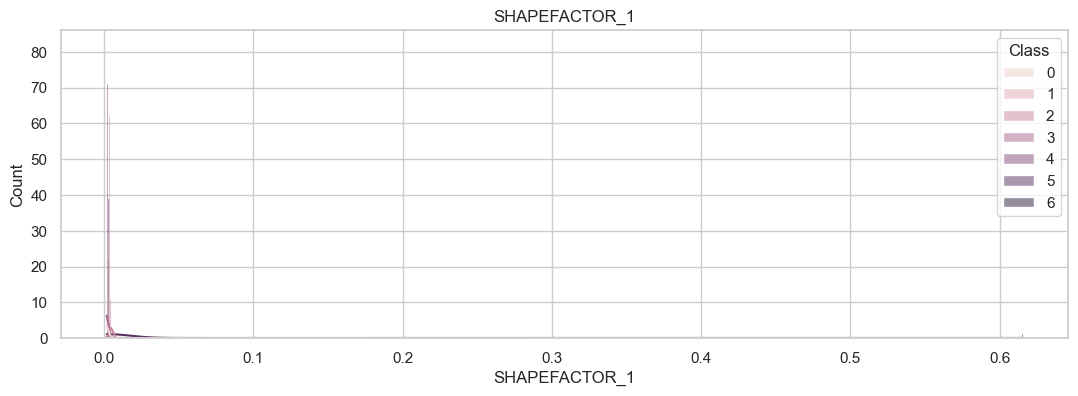

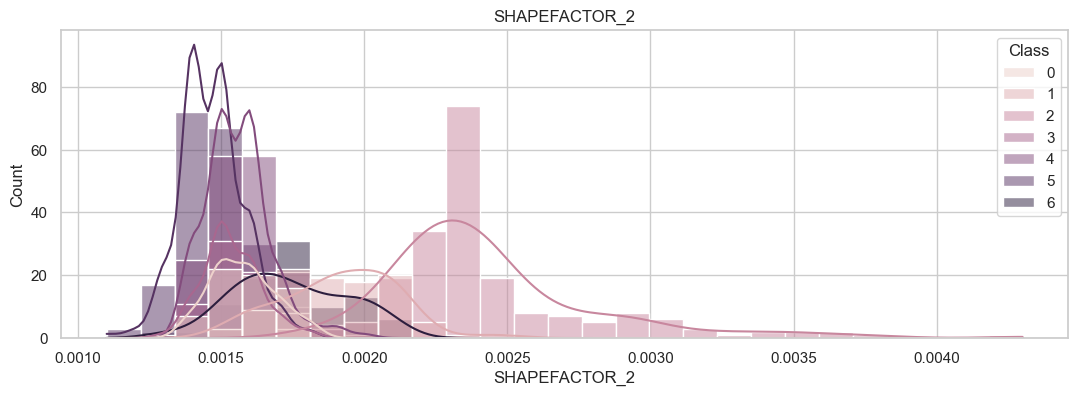

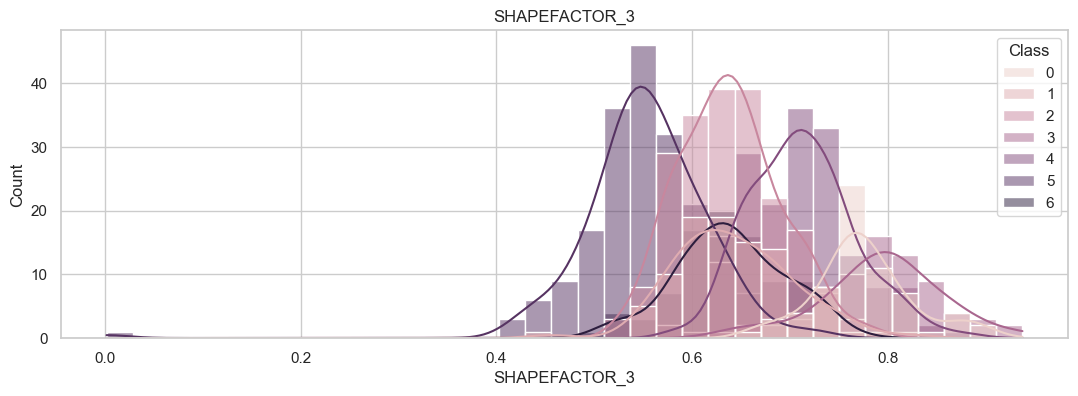

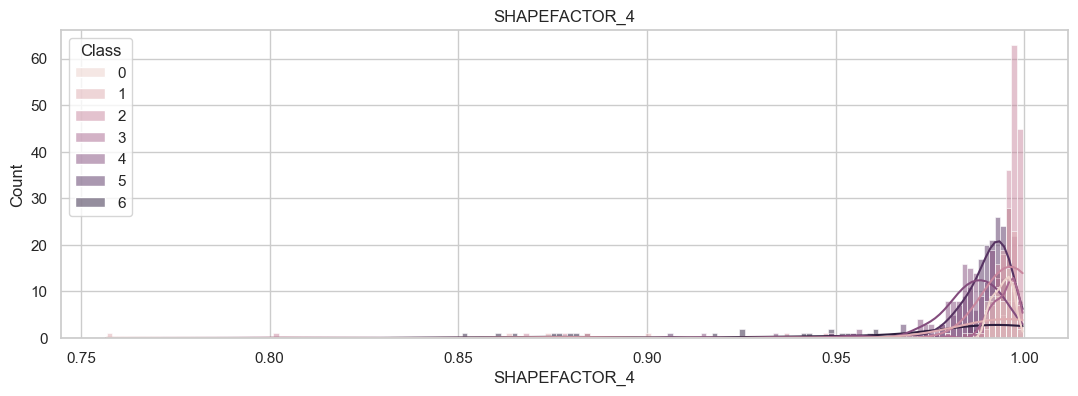

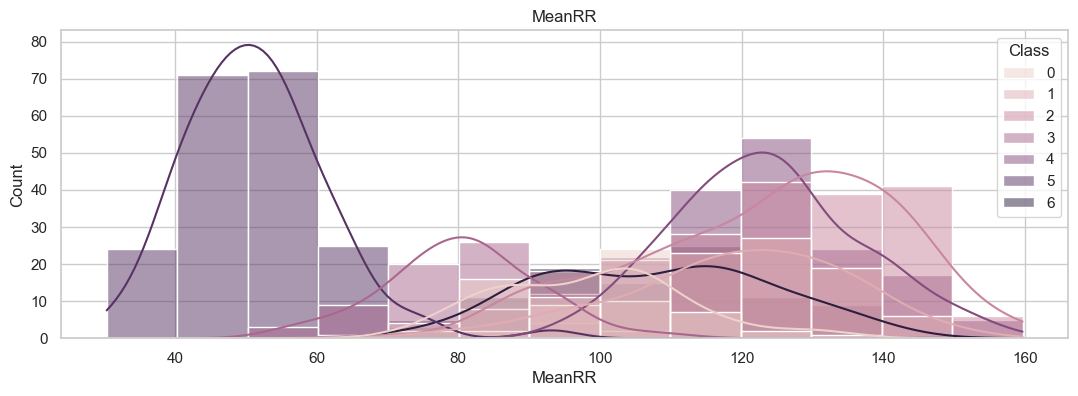

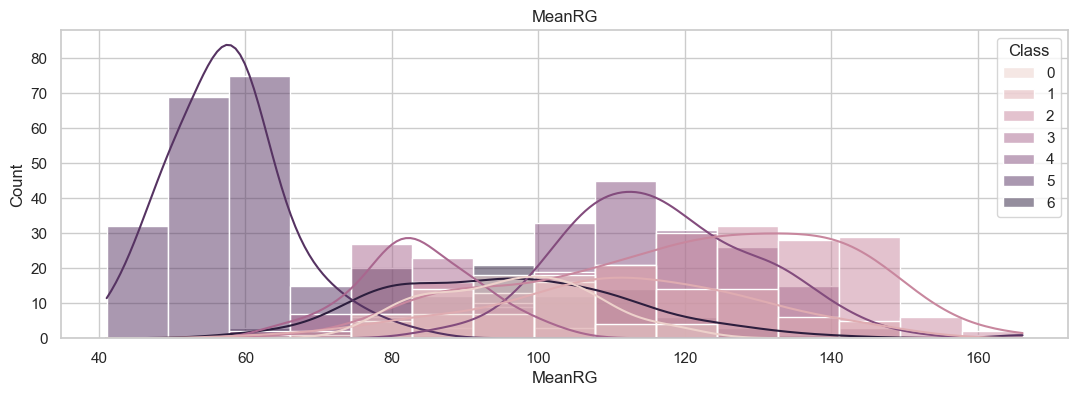

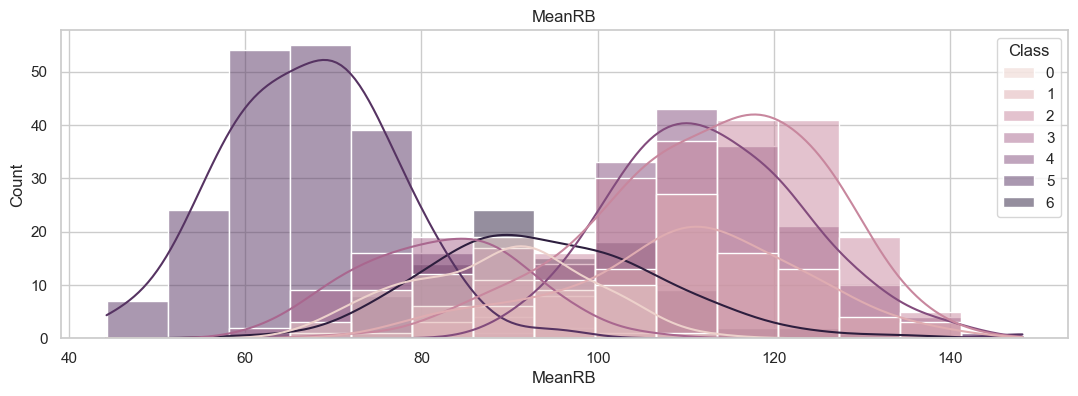

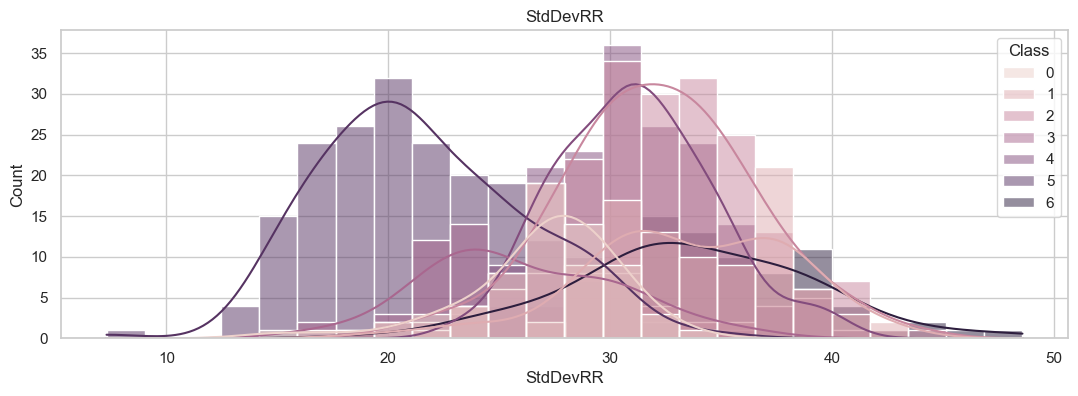

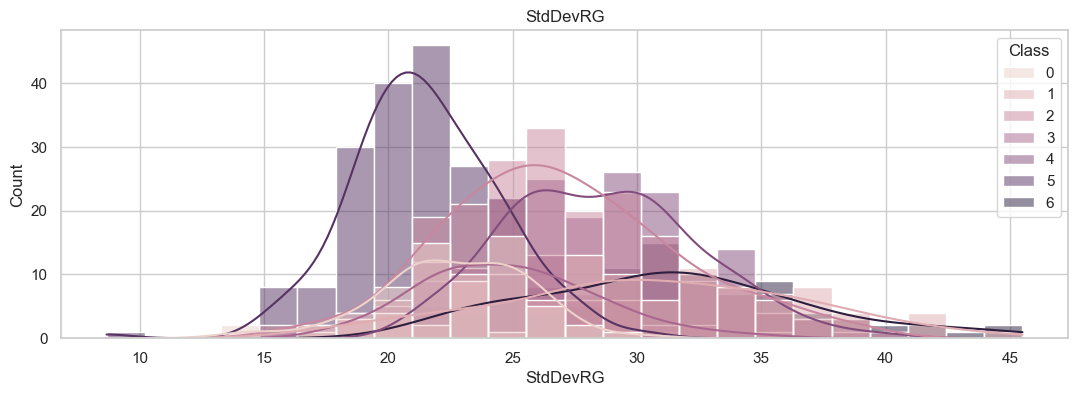

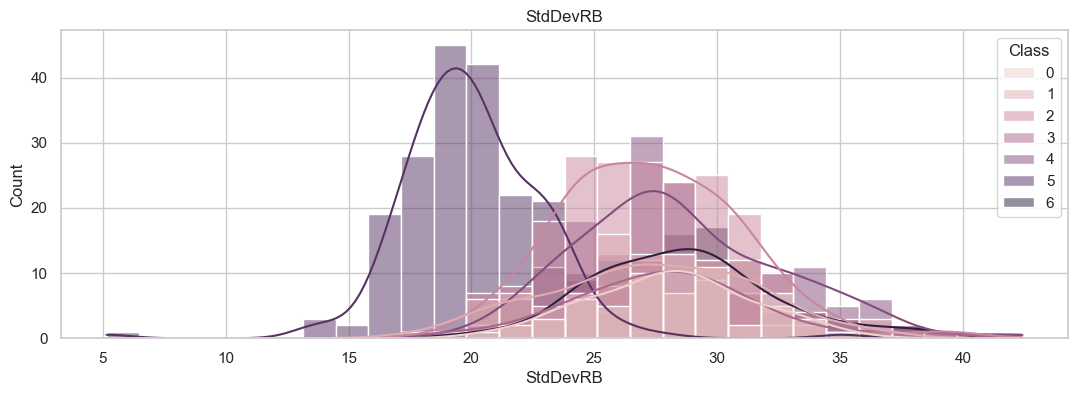

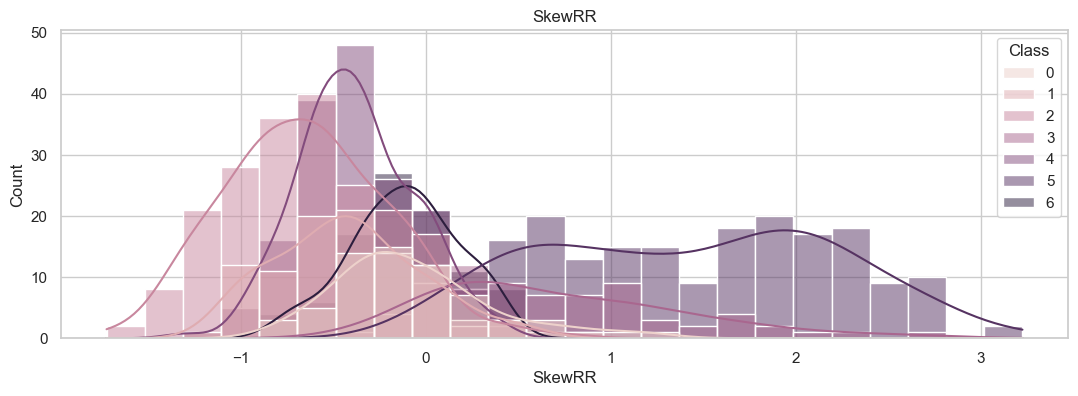

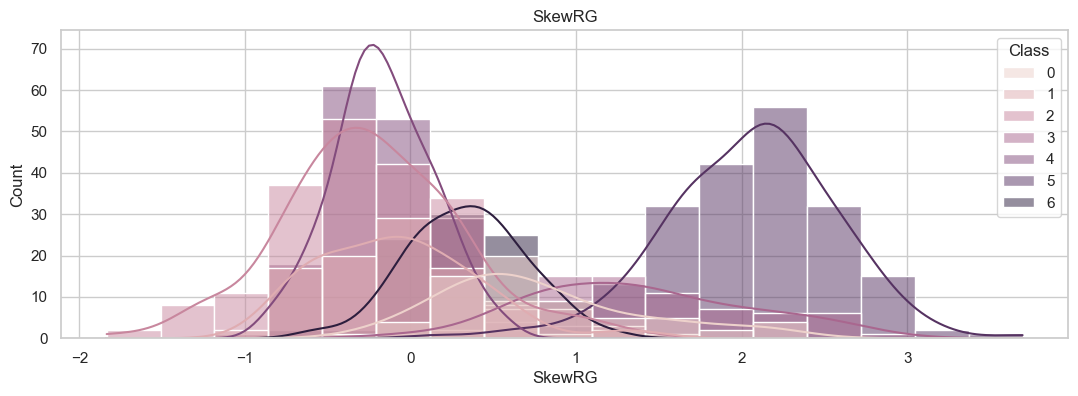

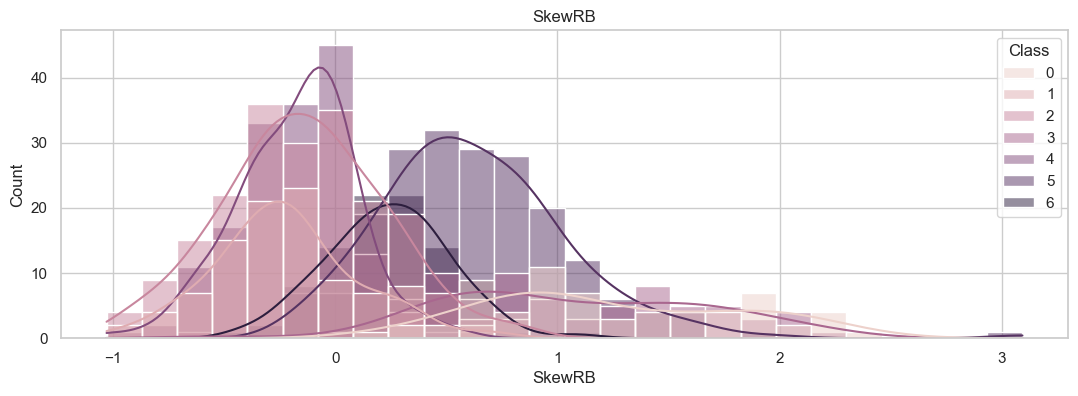

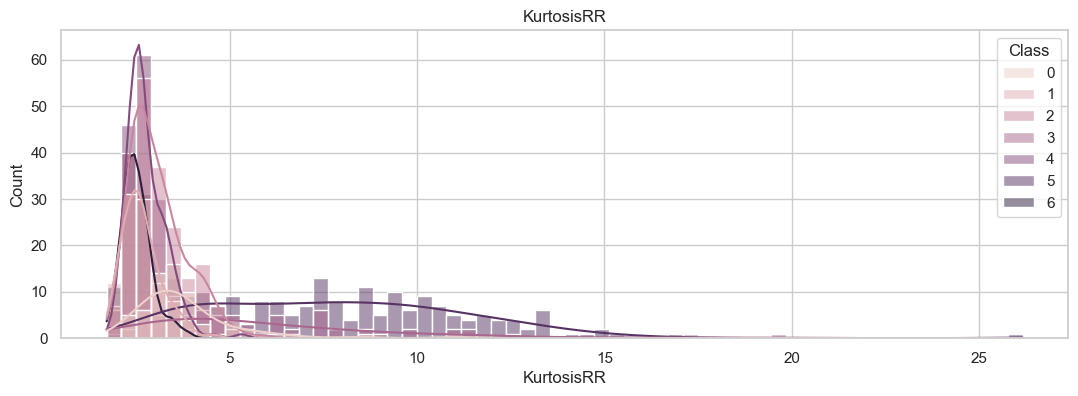

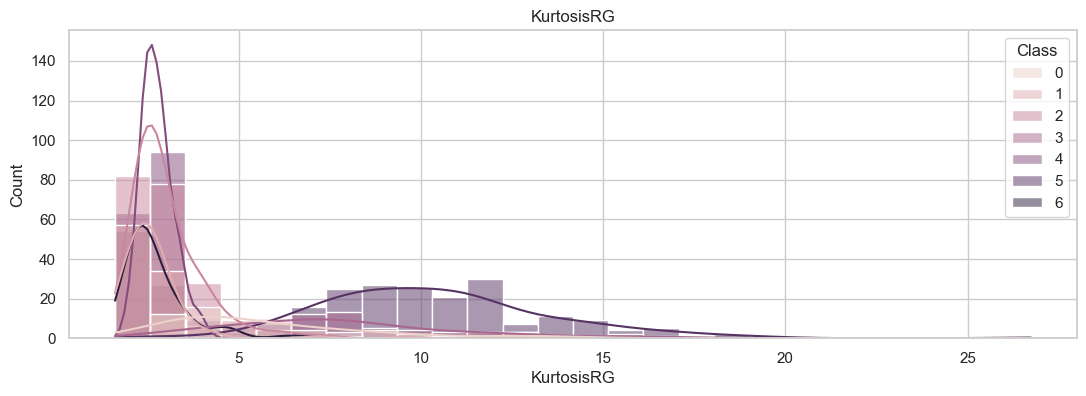

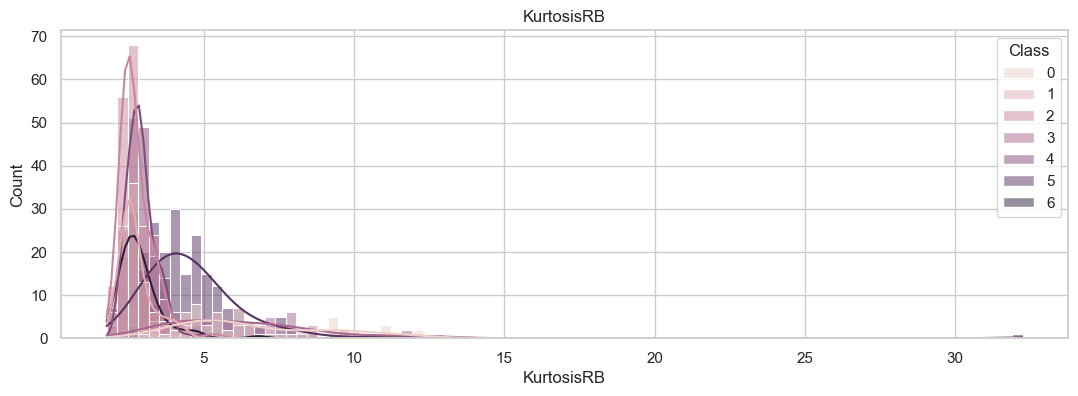

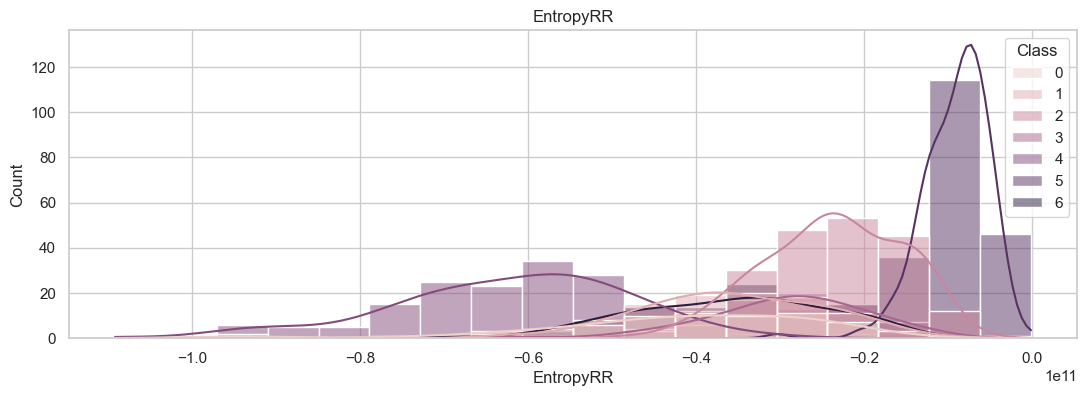

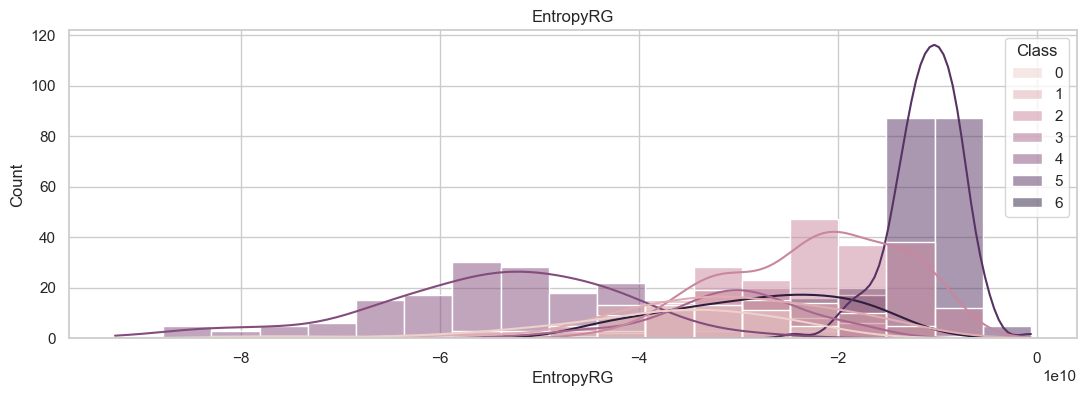

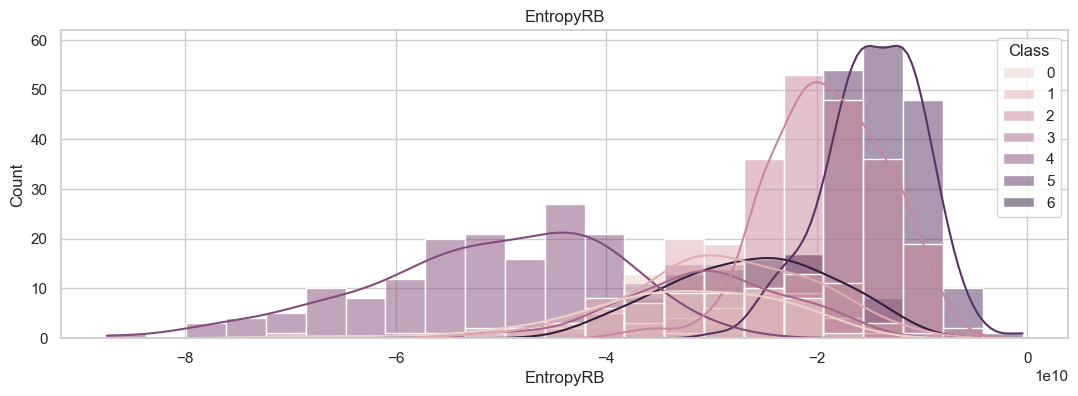

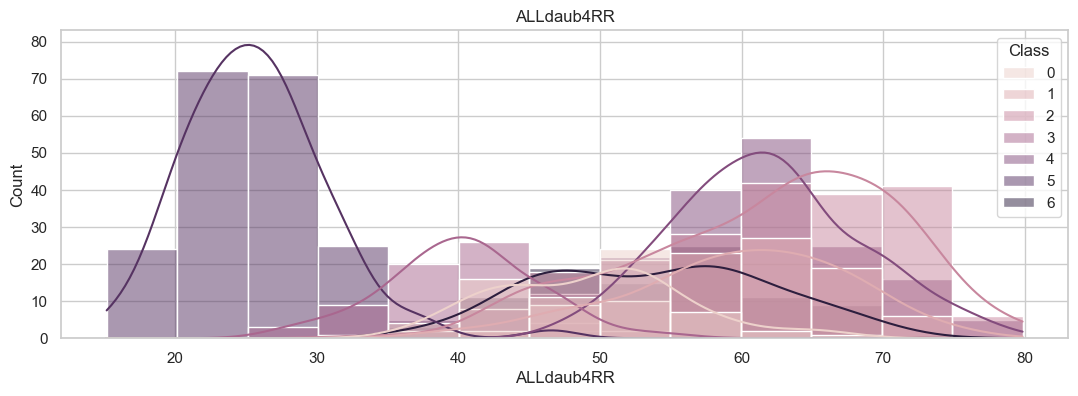

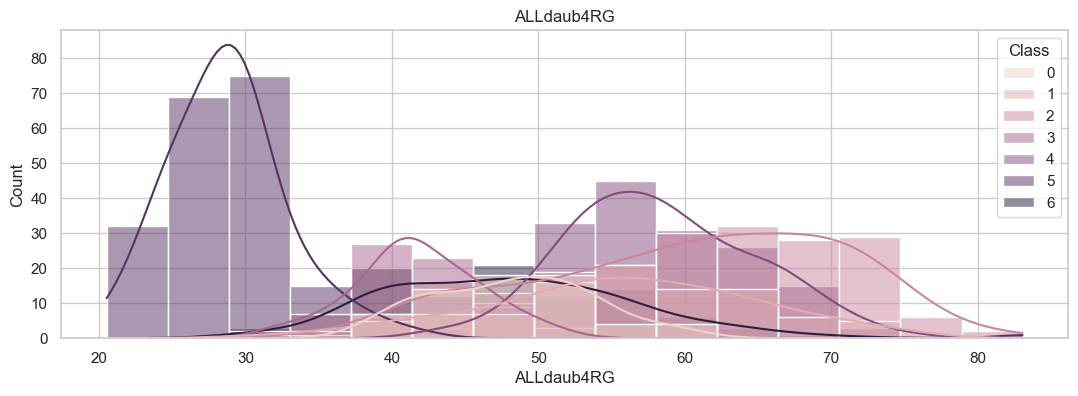

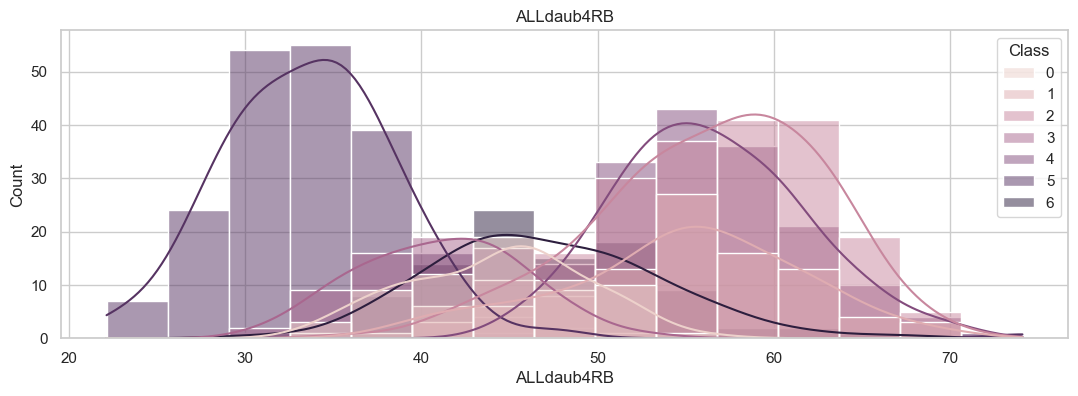

In [458]:

def draw_distributions(features, column):
    plt.figure(figsize=(13, 4))
    plt.title(f'{column}')
    sns.histplot(data=features, x=column, kde=True, hue='Class')
    plt.show()

for column in date_fruit.columns[:-1]:
    draw_distributions(date_fruit, column)

1.there is no equal varaince in all tha features
2.some outlier are too far in few features

4.find out the correlation between :
                                    1.(meanrr,meanrb,meanrg),
                                    2.(Kurtosisrg,kurtosisrr,kurtosisrb),
                                    3.(Allduabrr,Allduabrg,Allduabrb).

In [459]:
corr_group_mean = date_fruit[['MeanRR', 'MeanRB', 'MeanRG']].corr()
print("Correlation Matrix for MeanRR, MeanRB, MeanRG:\n", corr_group_mean)

Correlation Matrix for MeanRR, MeanRB, MeanRG:
           MeanRR    MeanRB    MeanRG
MeanRR  1.000000  0.941831  0.973355
MeanRB  0.941831  1.000000  0.954568
MeanRG  0.973355  0.954568  1.000000


In [460]:
date_fruit['MeanCombined'] = date_fruit[['MeanRR', 'MeanRB', 'MeanRG']].mean(axis=1)


In [461]:
date_fruit

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRG  KurtosisRB  \
0      0.9947       424428  0.7831        1.2976  ...      2.9574      4.2287   
1      0.9974       339014  0.7795        1.2161  ...      2.6350      3.1704   
2      0.9962       528876  0.7657        1.3150  ...      3.8611      4.7192   
3      0.9948       418255  0.7759        1.2831  ...      8.6136      8.2618   
4      0.9908       350797  0.7569        1.3108  ...      2.9761      4.4146   
..        ...          ...     ...           ...  ...         ...         ...   
893    0.9785       261028  0.7269        1.4499  ...      2.3704      2.7202   
894    0.9466       386566  0.6695        1.5510  ...      3.5805      3.9910   
895    0.9925       256255  0.7240        1.7159  ...      2.5090      2.6951   
896    0.9604       248795  0.6954        1.6220  ...      2.6874      2.7991   
897    0.9781       351472  0.6941        1.5405  ...      3.0369      3.0865   

       EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLdaub4RG  \
0   -59191263232 -50714214400 -39922372608     58.7255     54.9554   
1   -34233065472 -37462601728 -31477794816     50.0259     52.8168   
2   -93948354560 -74738221056 -60311207936     65.4772     59.2860   
3   -32074307584 -32060925952 -29575010304     43.3900     44.1259   
4   -39980974080 -35980042240 -25593278464     52.7743     50.9080   
..           ...          ...          ...         ...         ...   
893 -25296416768 -19168882688 -18473392128     49.0869     43.0422   
894 -31605219328 -21945366528 -19277905920     46.8086     39.1046   
895 -22242772992 -19594921984 -17592152064     44.1325     40.7986   
896 -26048595968 -21299822592 -19809978368     51.2267     45.7162   
897 -31983476736 -20482514944 -21219354624     47.3454     38.6966   

     ALLdaub4RB  Class  MeanCombined  
0       47.8400      0    107.677500  
1       47.8315      0    100.450067  
2       51.9378      0    117.800367  
3       41.1882      0     85.802667  
4       42.6666      0     97.565267  
..          ...    ...           ...  
893     42.4153      6     89.691333  
894     36.5502      6     81.644833  
895     40.9769      6     83.928167  
896     45.6260      6     95.050300  
897     39.6738      6     83.808600  

[898 rows x 36 columns]

In [462]:

corr_group_kurtosis = date_fruit[['KurtosisRG', 'KurtosisRR', 'KurtosisRB']].corr()
print("Correlation Matrix for KurtosisRG, KurtosisRR, KurtosisRB:\n", corr_group_kurtosis)


Correlation Matrix for KurtosisRG, KurtosisRR, KurtosisRB:
             KurtosisRG  KurtosisRR  KurtosisRB
KurtosisRG    1.000000    0.791051    0.666257
KurtosisRR    0.791051    1.000000    0.595030
KurtosisRB    0.666257    0.595030    1.000000


In [463]:
date_fruit['KurtosisCombined'] = date_fruit[['KurtosisRR', 'KurtosisRB', 'KurtosisRG']].mean(axis=1)


In [464]:

corr_group_ALLdaub = date_fruit[['ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']].corr()
print("Correlation Matrix for ALLdaubRR, ALLdaubRG, ALLdaubRB:\n", corr_group_ALLdaub)


Correlation Matrix for ALLdaubRR, ALLdaubRG, ALLdaubRB:
             ALLdaub4RR  ALLdaub4RG  ALLdaub4RB
ALLdaub4RR    1.000000    0.973357    0.941838
ALLdaub4RG    0.973357    1.000000    0.954572
ALLdaub4RB    0.941838    0.954572    1.000000


In [465]:
date_fruit['ALLdaub4Combined'] = date_fruit[['ALLdaub4RR', 'ALLdaub4RB', 'ALLdaub4RG']].mean(axis=1)


In [466]:
corr_group_entropy = date_fruit[['EntropyRR', 'EntropyRG', 'EntropyRB']].corr()
print("Correlation Matrix for EntropyRR, EntropyRG, EntropyRB:\n", corr_group_entropy)

Correlation Matrix for EntropyRR, EntropyRG, EntropyRB:
            EntropyRR  EntropyRG  EntropyRB
EntropyRR   1.000000   0.981412   0.937108
EntropyRG   0.981412   1.000000   0.950605
EntropyRB   0.937108   0.950605   1.000000


In [467]:
date_fruit['EntropyCombined'] = date_fruit[['EntropyRR', 'EntropyRG', 'EntropyRB']].mean(axis=1)


In [468]:
corr_group_Shapefactor = date_fruit[['SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3','SHAPEFACTOR_4']].corr()
print("Correlation Matrix for 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3','SHAPEFACTOR_4':\n", corr_group_Shapefactor)

Correlation Matrix for 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3','SHAPEFACTOR_4':
                SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4
SHAPEFACTOR_1       1.000000      -0.025354      -0.245419      -0.136144
SHAPEFACTOR_2      -0.025354       1.000000       0.075128      -0.057377
SHAPEFACTOR_3      -0.245419       0.075128       1.000000       0.170575
SHAPEFACTOR_4      -0.136144      -0.057377       0.170575       1.000000


so shape factor is not highly corelated it is negatively corelated that is why se will not going to combine this.

In [469]:
corr_group_stdDev = date_fruit[['StdDevRB', 'StdDevRG', 'StdDevRR']].corr()
print("Correlation Matrix for StdDevRB', 'StdDevRG', 'StdDevRR:\n", corr_group_stdDev)

Correlation Matrix for StdDevRB', 'StdDevRG', 'StdDevRR:
           StdDevRB  StdDevRG  StdDevRR
StdDevRB  1.000000  0.744889  0.743259
StdDevRG  0.744889  1.000000  0.886635
StdDevRR  0.743259  0.886635  1.000000


In [470]:
date_fruit['StdDevCombined'] = date_fruit[['StdDevRB', 'StdDevRG', 'StdDevRR']].mean(axis=1)


<Figure size 1200x800 with 0 Axes>

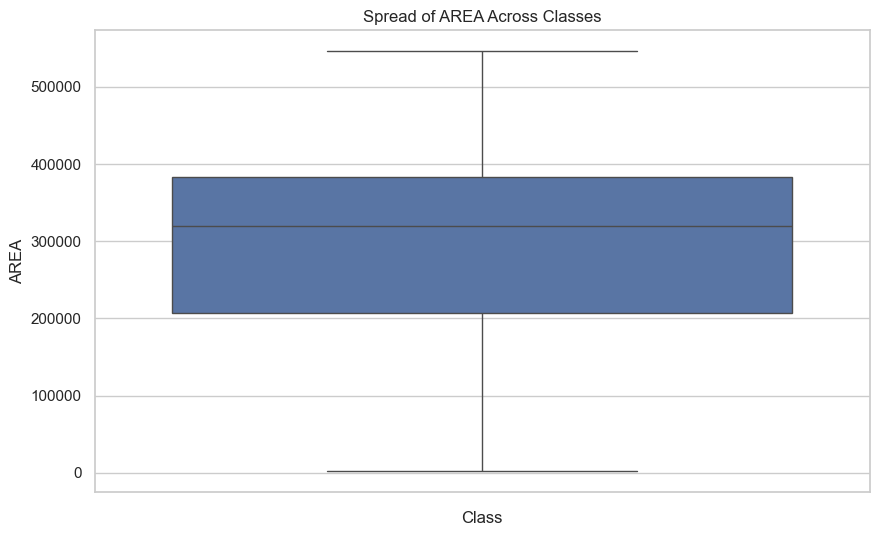

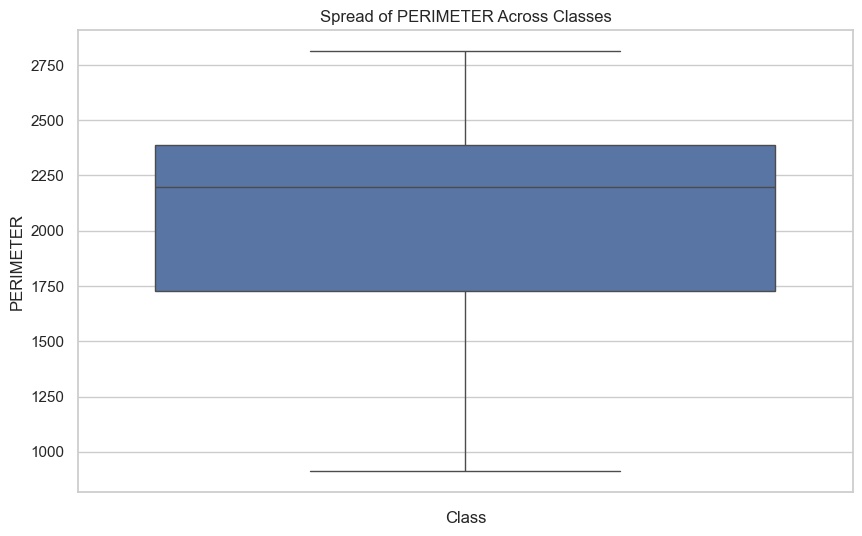

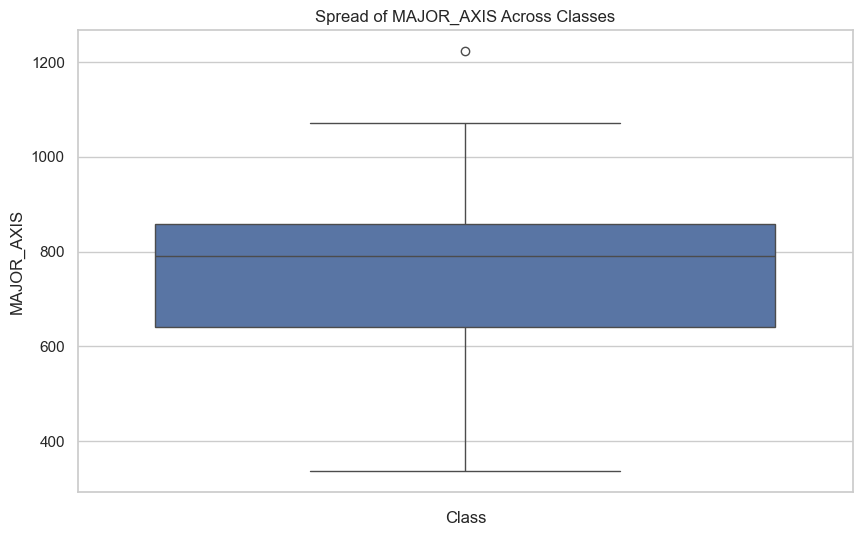

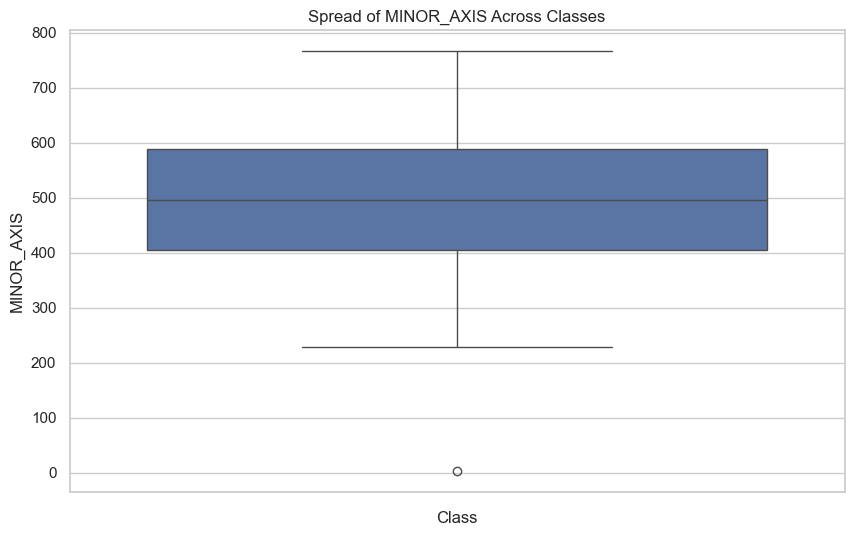

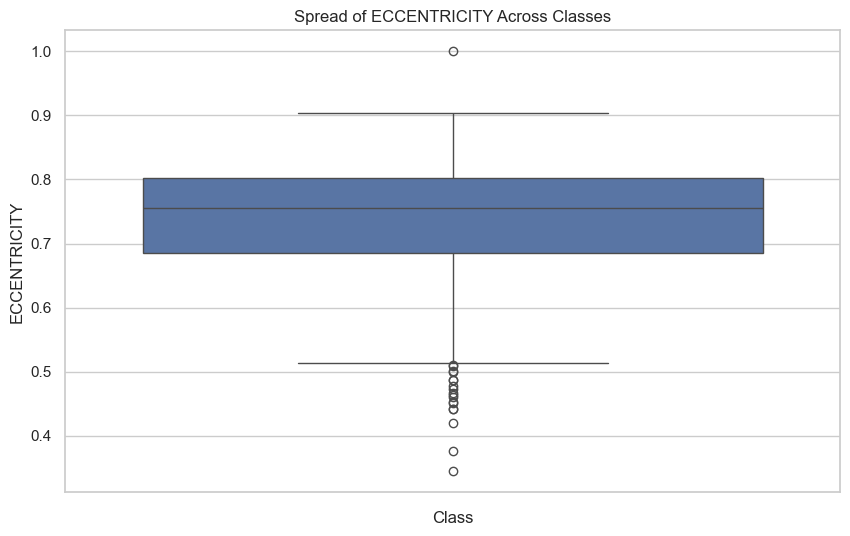

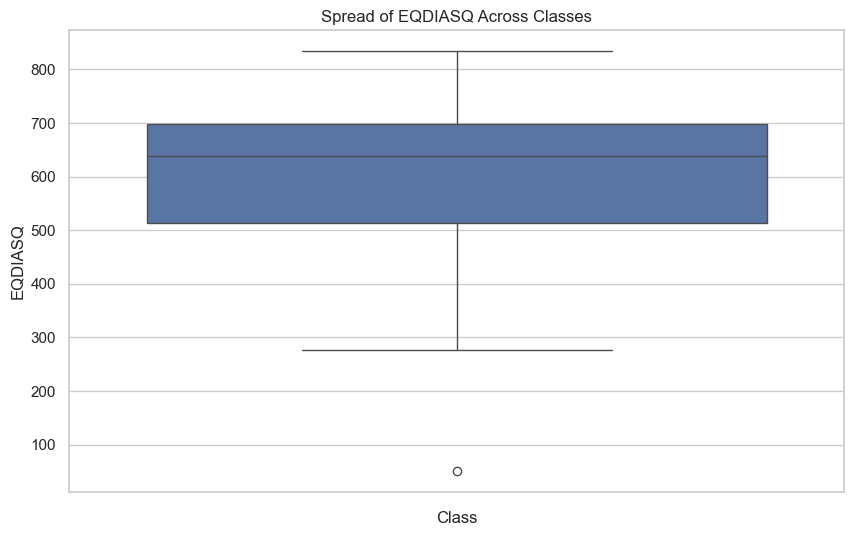

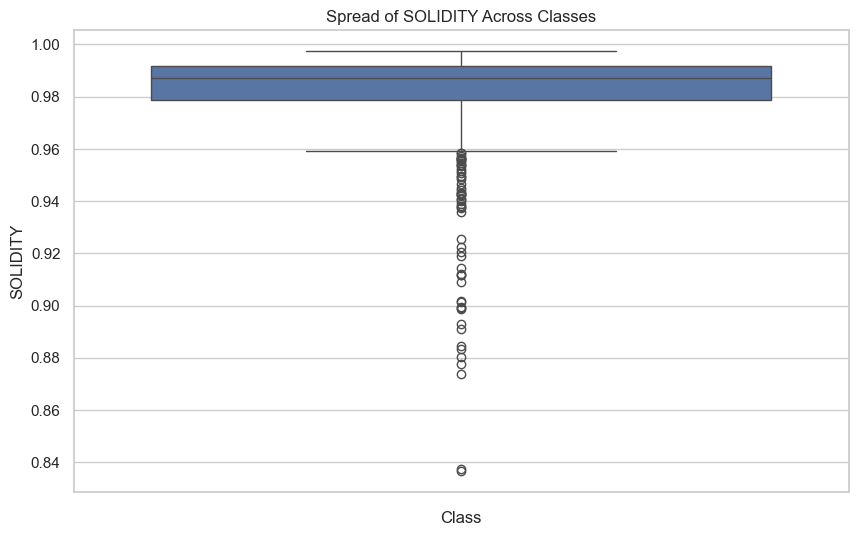

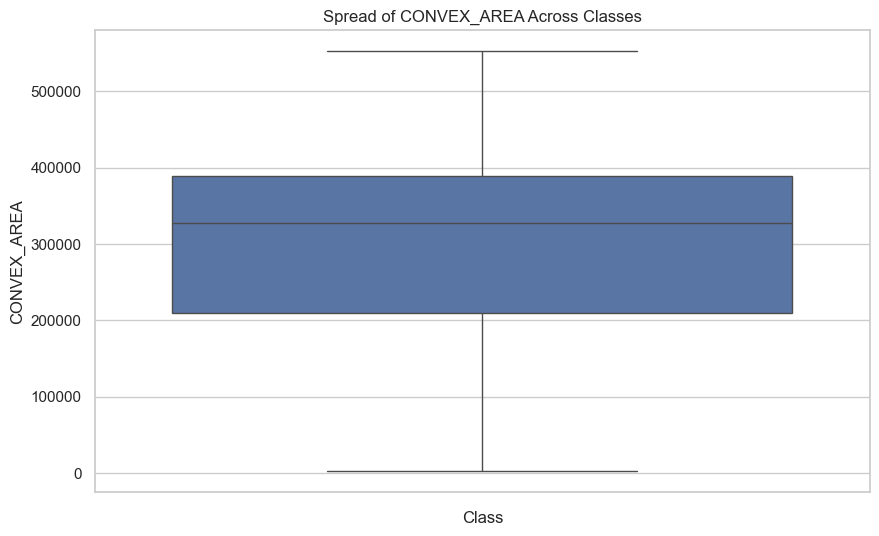

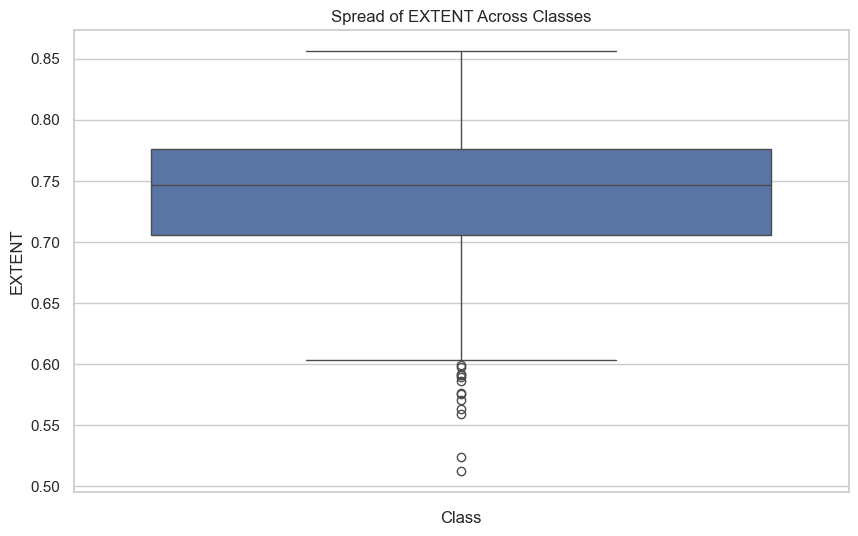

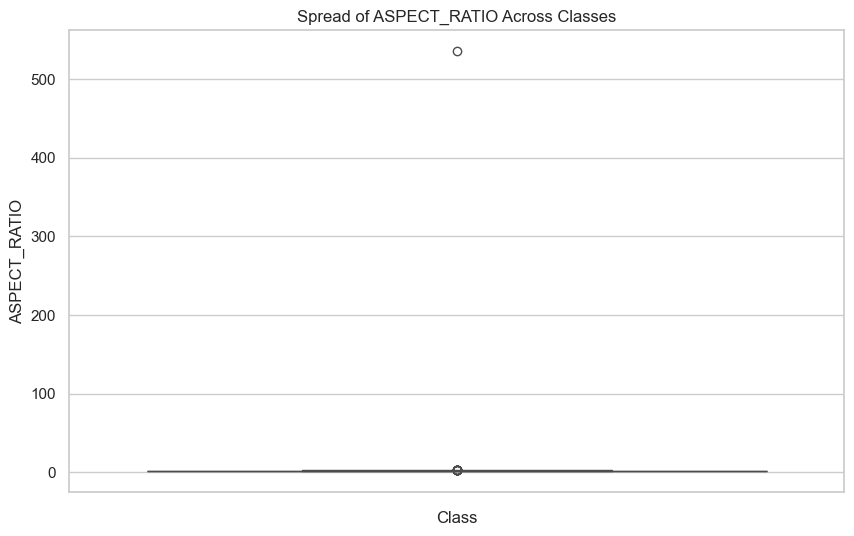

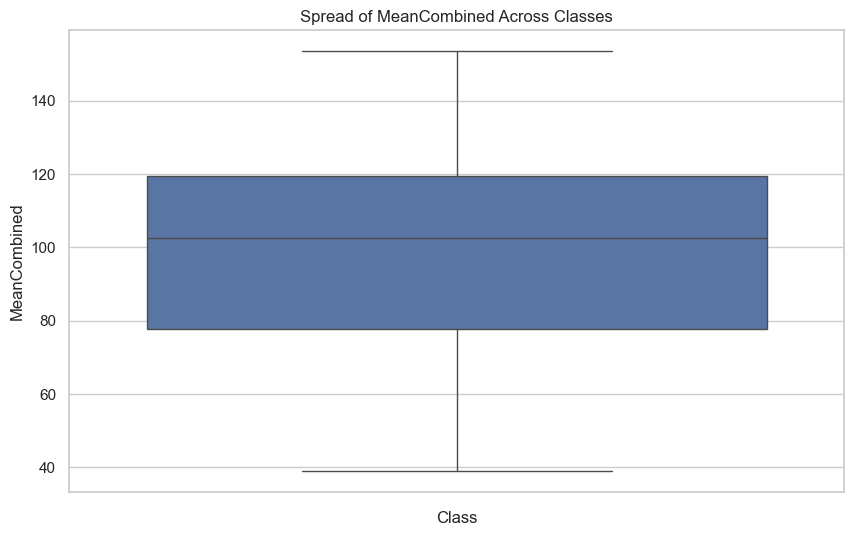

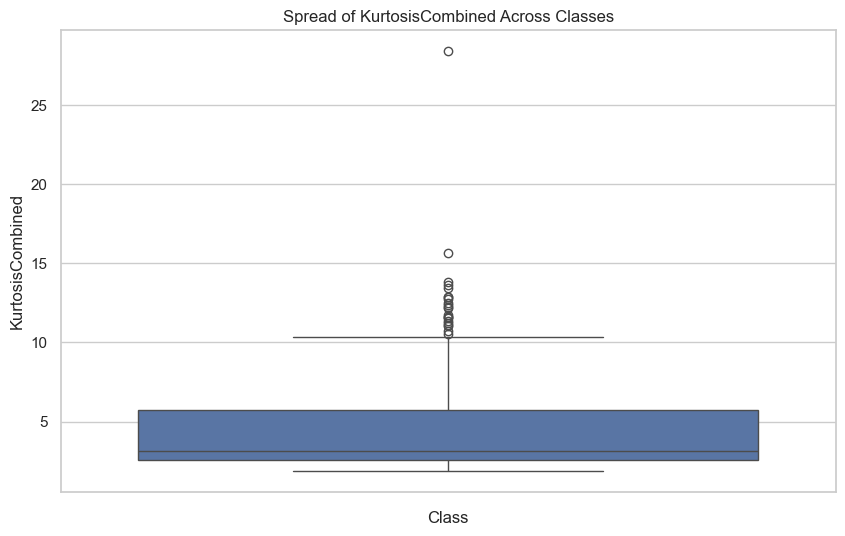

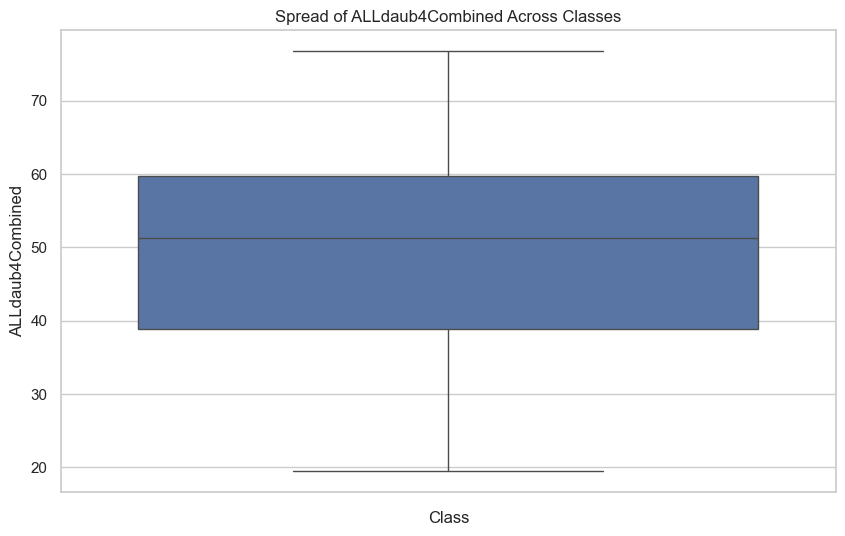

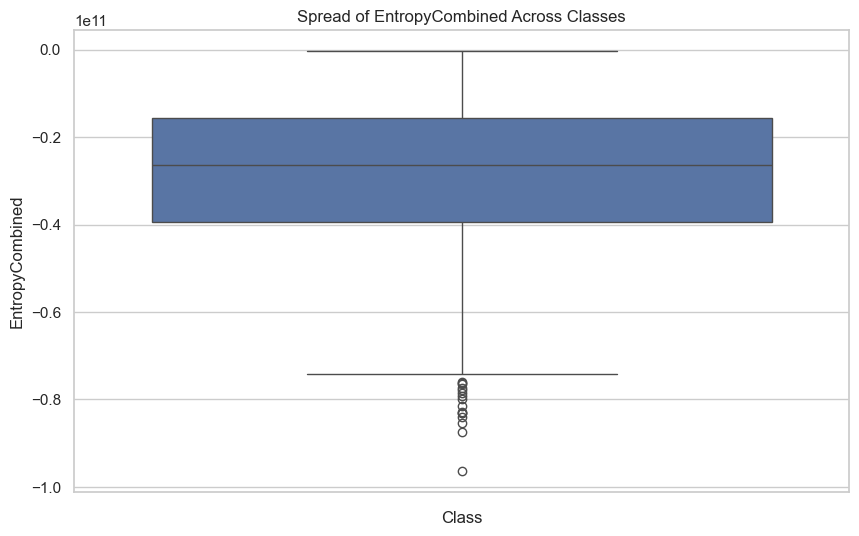

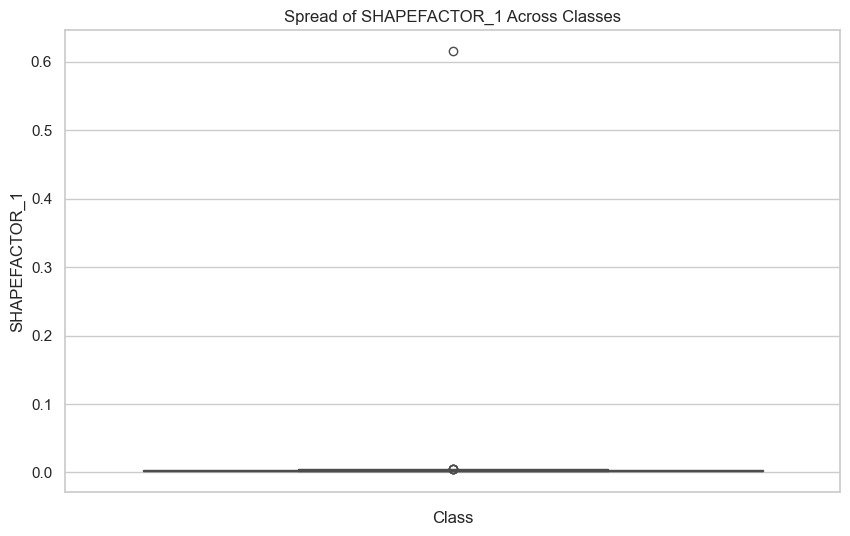

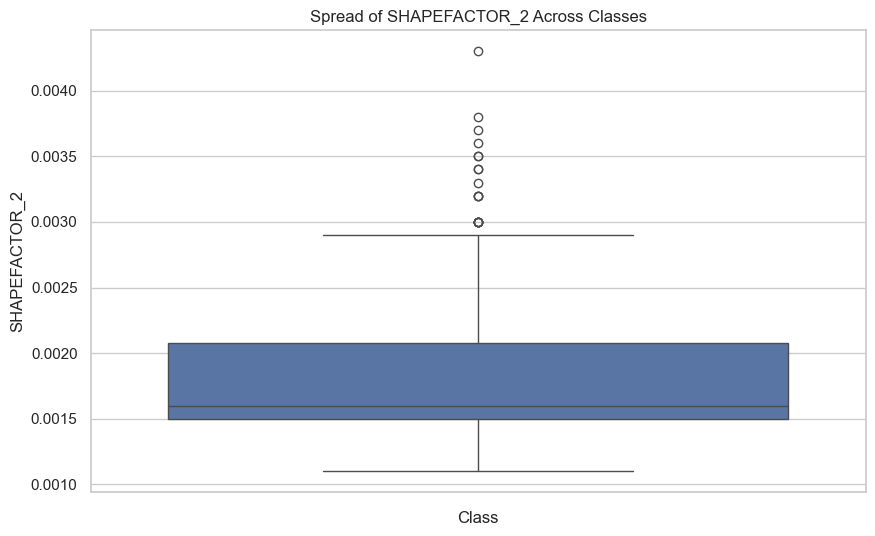

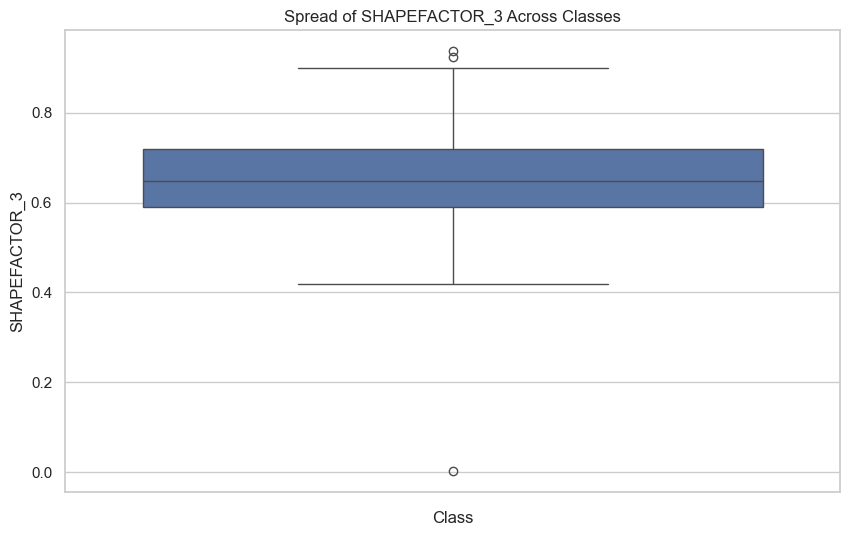

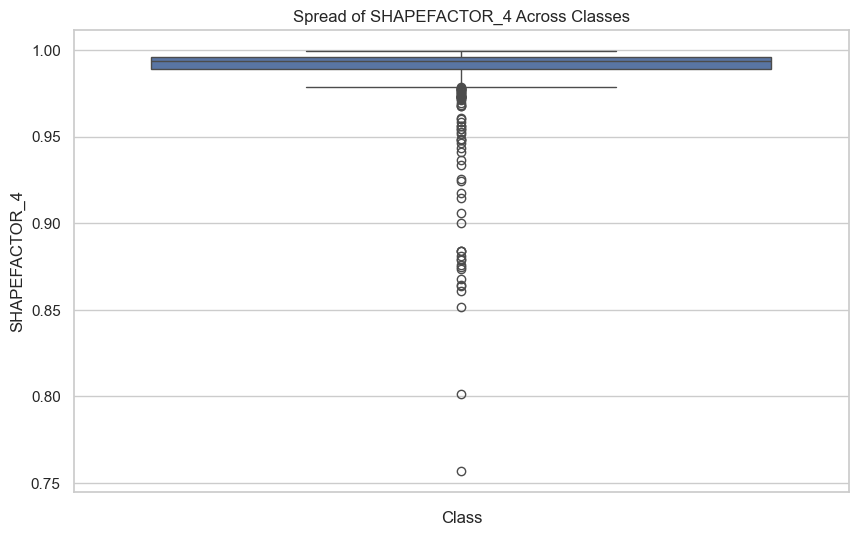

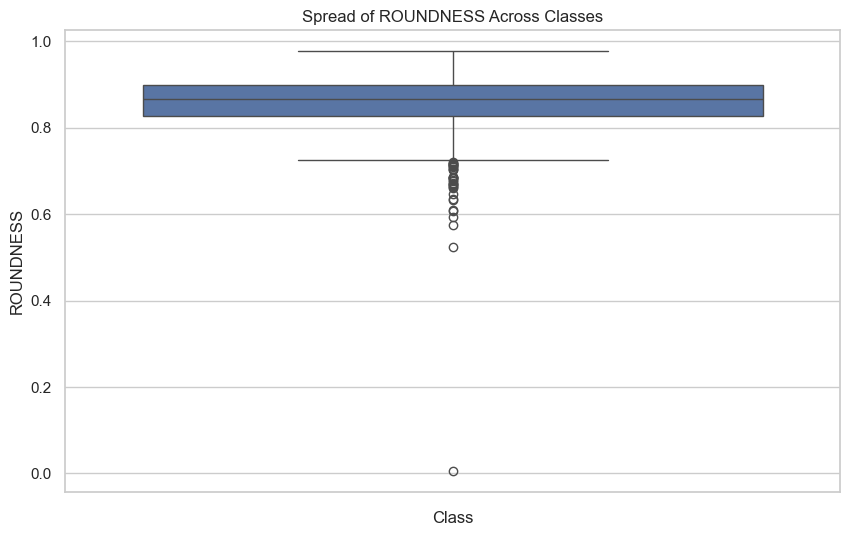

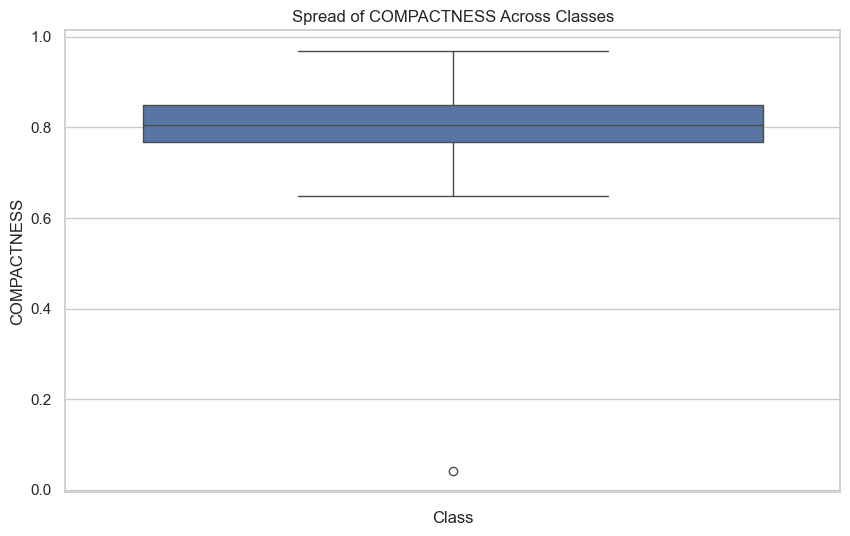

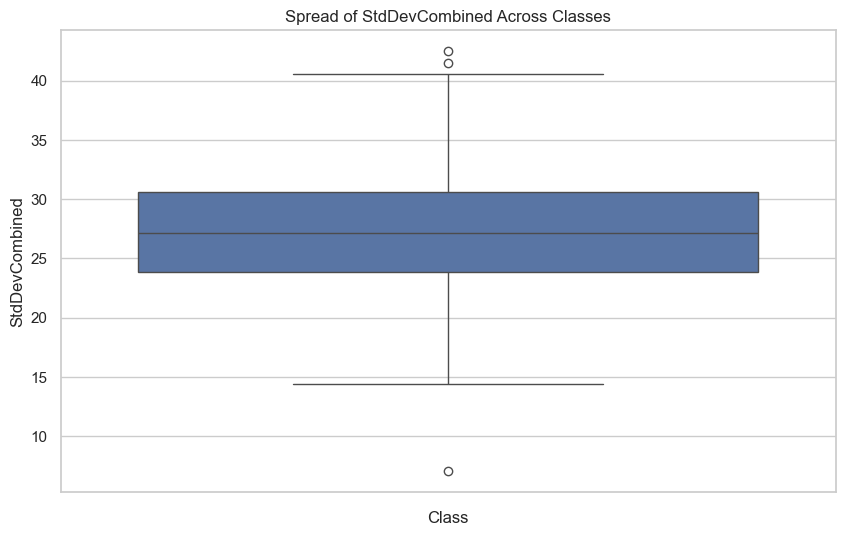

In [471]:
features = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY', 
            'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO', 'MeanCombined', 'KurtosisCombined', 'ALLdaub4Combined',"EntropyCombined","SHAPEFACTOR_1","SHAPEFACTOR_2","SHAPEFACTOR_3","SHAPEFACTOR_4","ROUNDNESS","COMPACTNESS","StdDevCombined"]
plt.figure(figsize=(12, 8))
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot( y=feature, data=date_fruit)
    plt.title(f'Spread of {feature} Across Classes')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.show()

In [472]:
z_score=(date_fruit-date_fruit.mean())/date_fruit.std()

threshold=3

outliers=(z_score > threshold) | (z_score < -threshold)
outlier_counts=outliers.sum()

print("Count of outliers for each column:")
print(outlier_counts)

Count of outliers for each column:
AREA                 0
PERIMETER            0
MAJOR_AXIS           1
MINOR_AXIS           1
ECCENTRICITY        10
EQDIASQ              1
SOLIDITY            23
CONVEX_AREA          0
EXTENT               5
ASPECT_RATIO         1
ROUNDNESS            8
COMPACTNESS          1
SHAPEFACTOR_1        1
SHAPEFACTOR_2       12
SHAPEFACTOR_3        1
SHAPEFACTOR_4       22
MeanRR               0
MeanRG               0
MeanRB               0
StdDevRR             2
StdDevRG             5
StdDevRB             2
SkewRR               2
SkewRG               1
SkewRB               7
KurtosisRR          16
KurtosisRG          10
KurtosisRB          17
EntropyRR            8
EntropyRG            8
EntropyRB            8
ALLdaub4RR           0
ALLdaub4RG           0
ALLdaub4RB           0
Class                0
MeanCombined         0
KurtosisCombined    11
ALLdaub4Combined     0
EntropyCombined      8
StdDevCombined       1
dtype: int64


In [473]:
corr = date_fruit.corr()

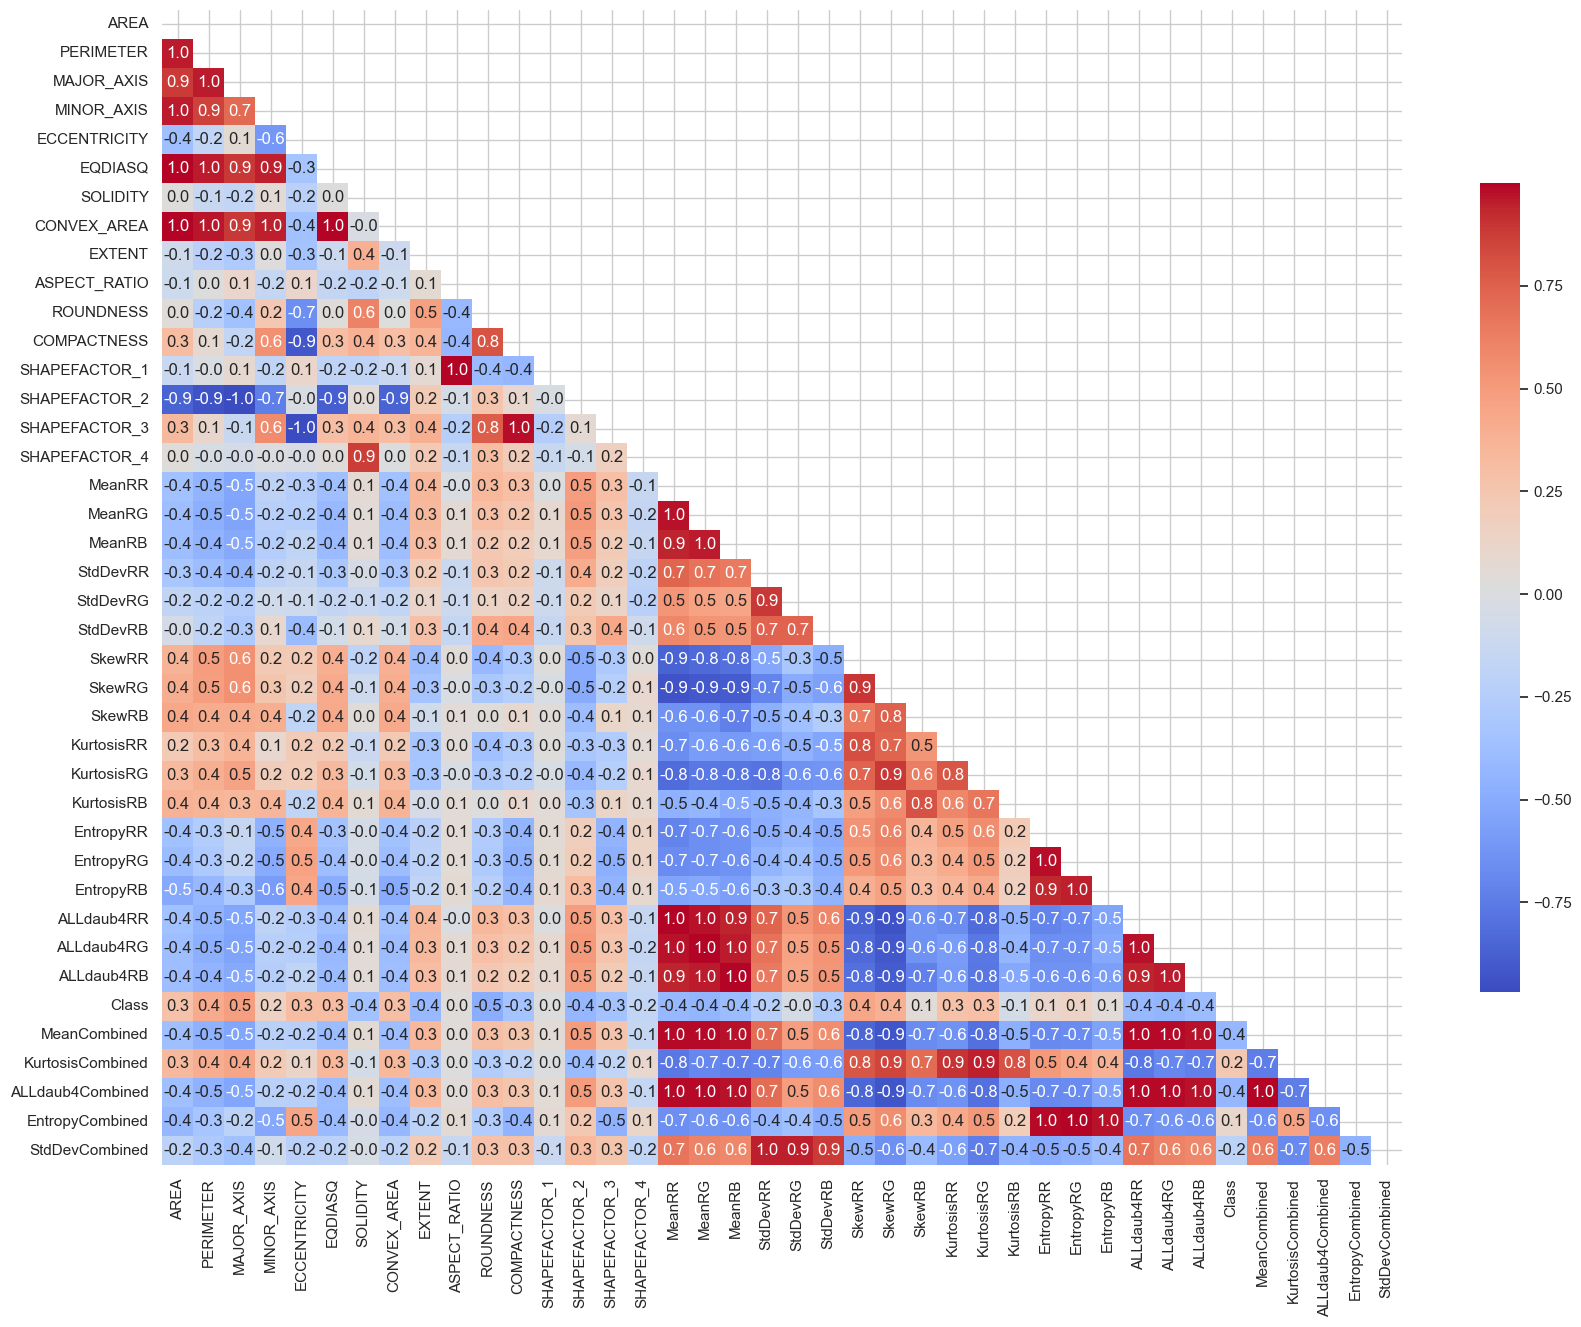

In [474]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'shrink': .7})

plt.show()

multicollinearity is too high

AREA vs perimeter 

<Axes: xlabel='AREA', ylabel='PERIMETER'>

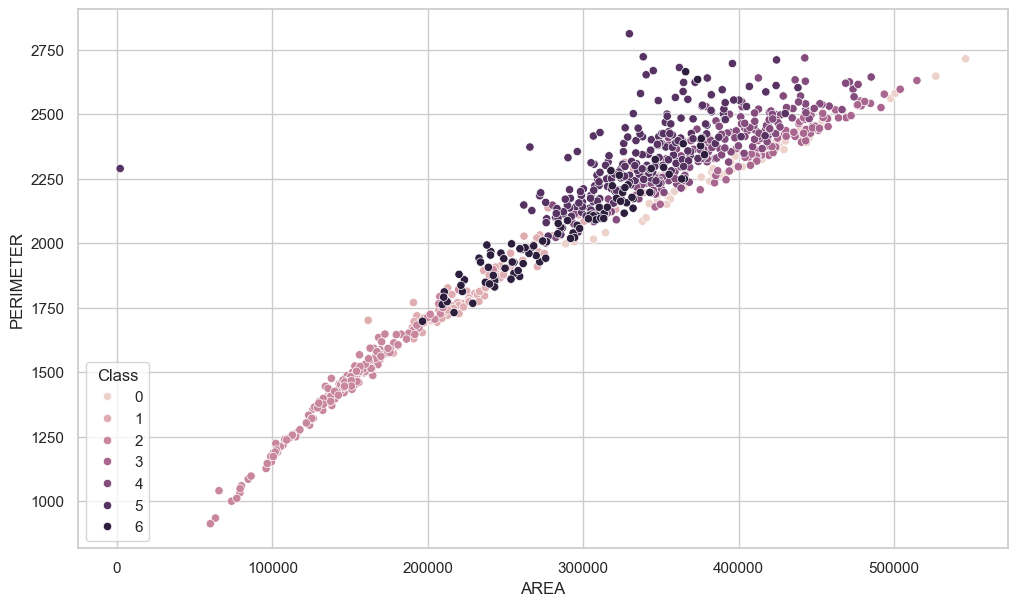

In [475]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="PERIMETER", hue='Class', data= date_fruit)

Area vs convex Area

<Axes: xlabel='AREA', ylabel='CONVEX_AREA'>

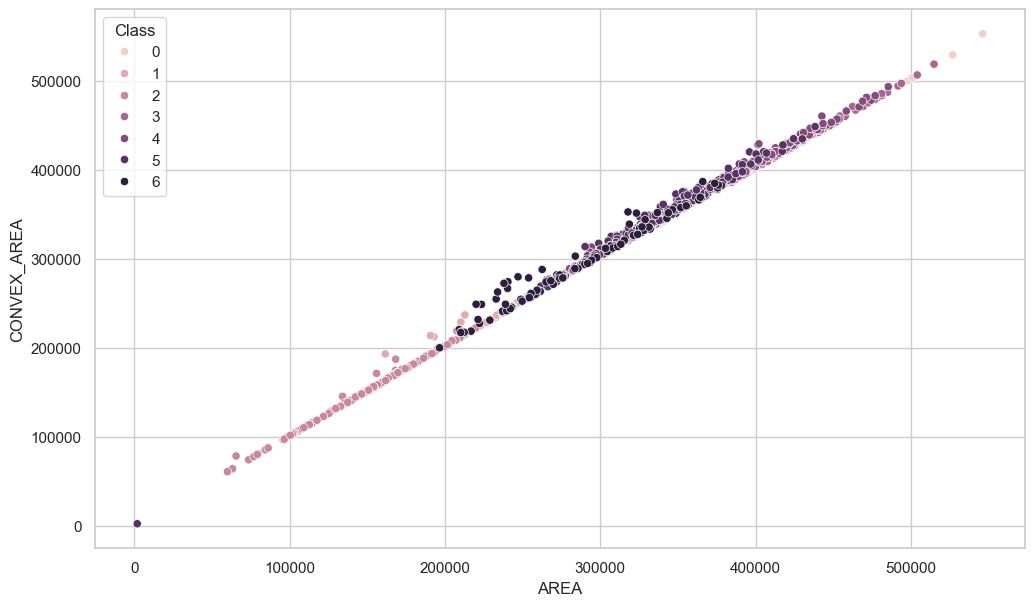

In [476]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="CONVEX_AREA", hue='Class', data= date_fruit)

Area vs major axis

<Axes: xlabel='AREA', ylabel='MAJOR_AXIS'>

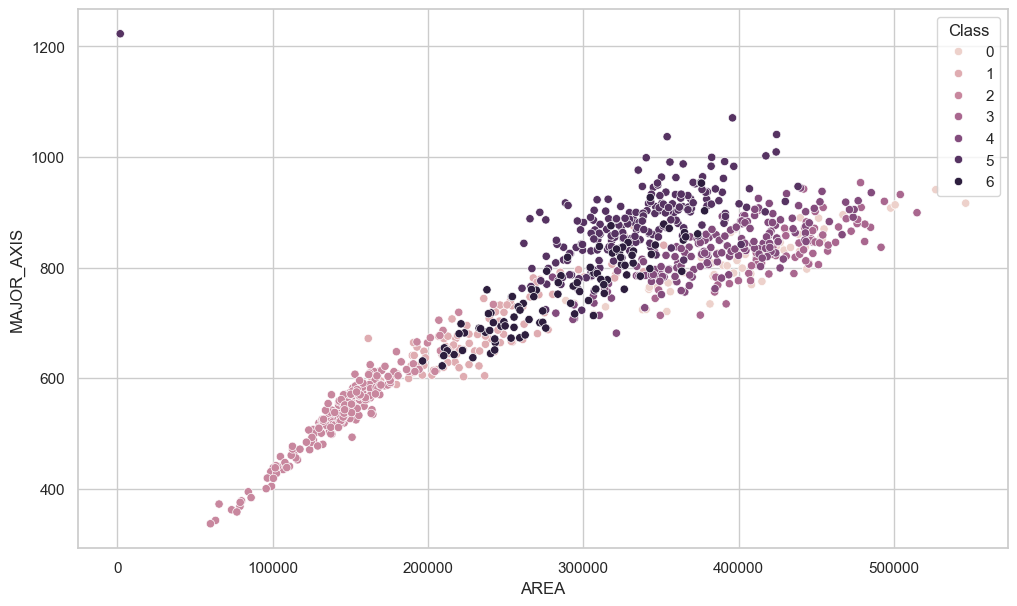

In [477]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="MAJOR_AXIS", hue='Class', data= date_fruit)

Area vs Minor axis

<Axes: xlabel='AREA', ylabel='MINOR_AXIS'>

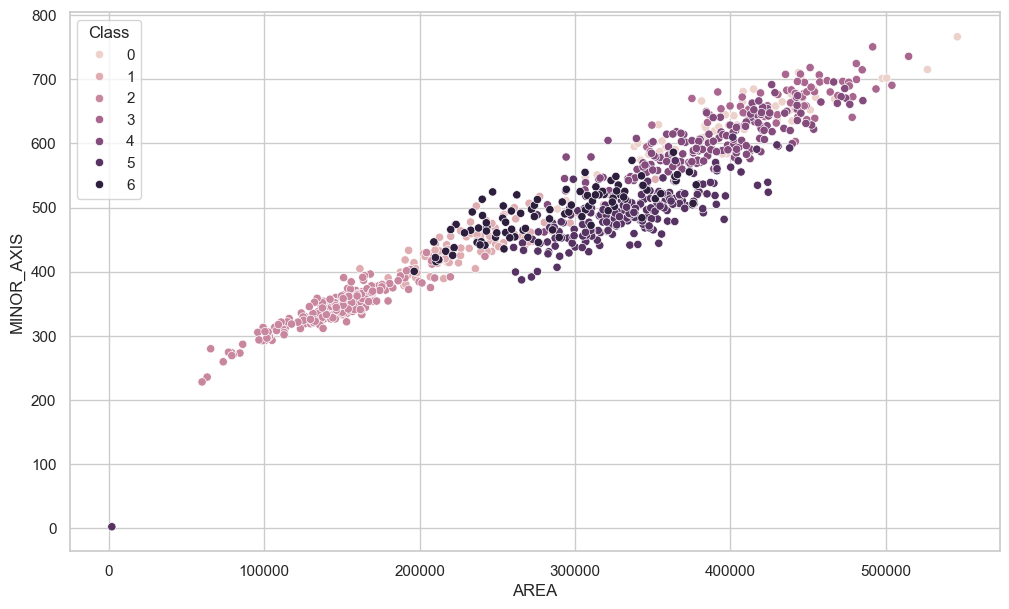

In [478]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="MINOR_AXIS", hue='Class', data= date_fruit)

Area vs EQDIASQ

<Axes: xlabel='AREA', ylabel='EQDIASQ'>

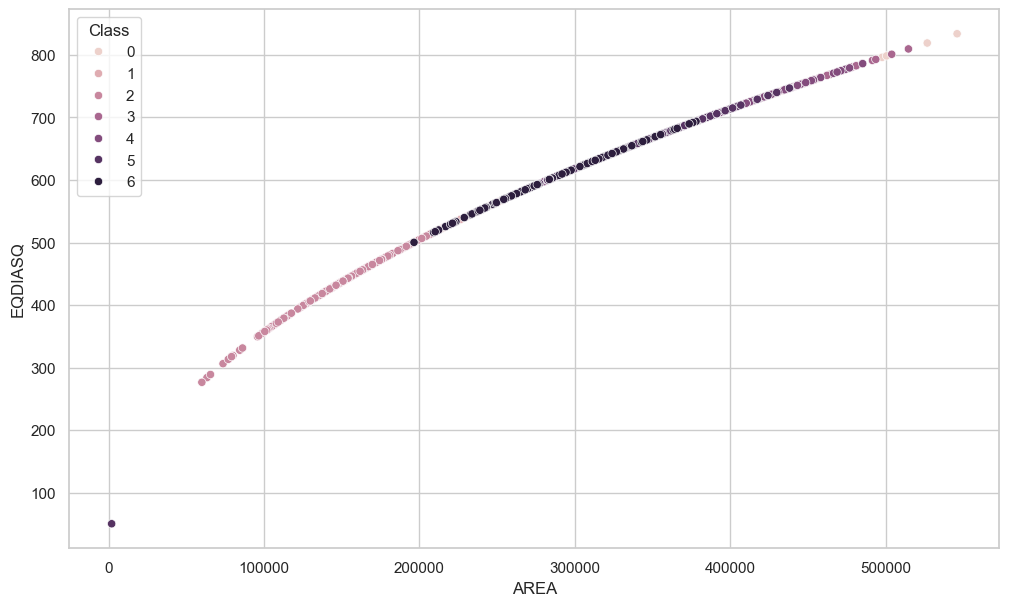

In [479]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="AREA" , y="EQDIASQ", hue='Class', data= date_fruit)

SHAPEFACTOR 4 vs SOLIDITY

<Axes: xlabel='SHAPEFACTOR_4', ylabel='SOLIDITY'>

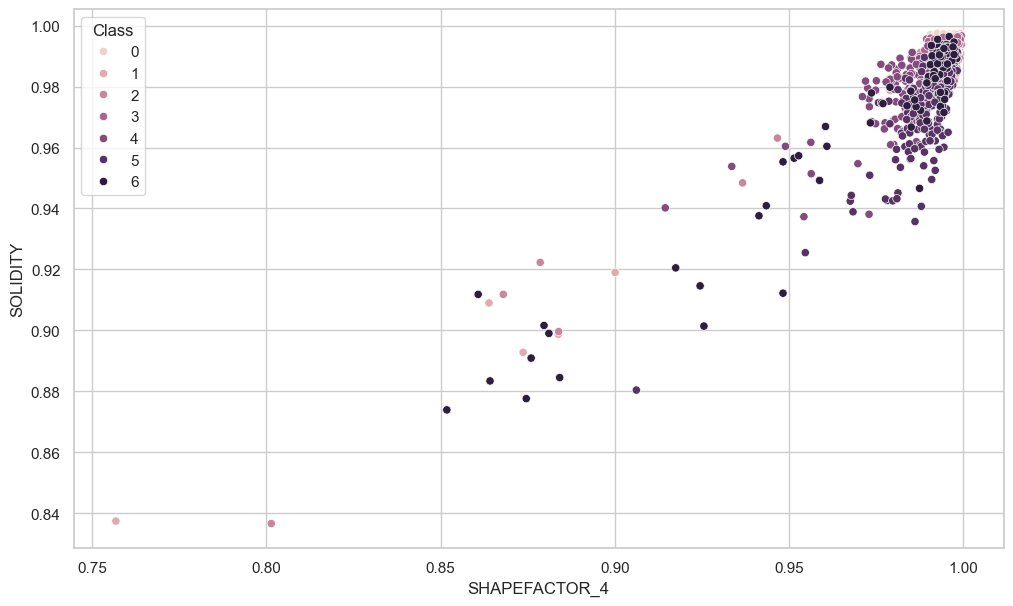

In [480]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="SHAPEFACTOR_4" , y="SOLIDITY", hue='Class', data= date_fruit)

Shapefactor1 vs compactness

<Axes: xlabel='SHAPEFACTOR_1', ylabel='COMPACTNESS'>

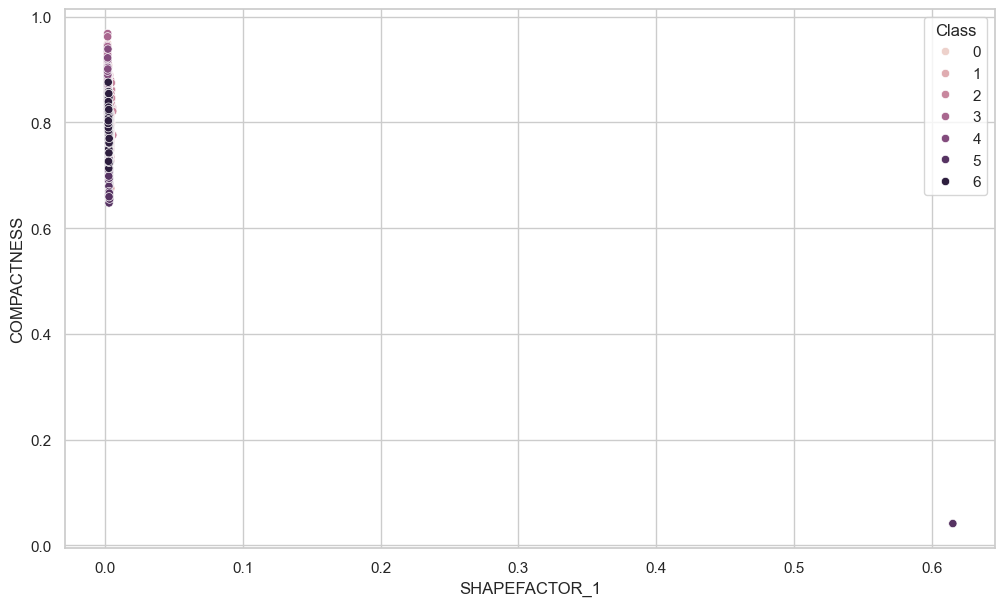

In [481]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="SHAPEFACTOR_1" , y="COMPACTNESS", hue='Class', data= date_fruit)

convexarea vs minor axis

<Axes: xlabel='CONVEX_AREA', ylabel='MINOR_AXIS'>

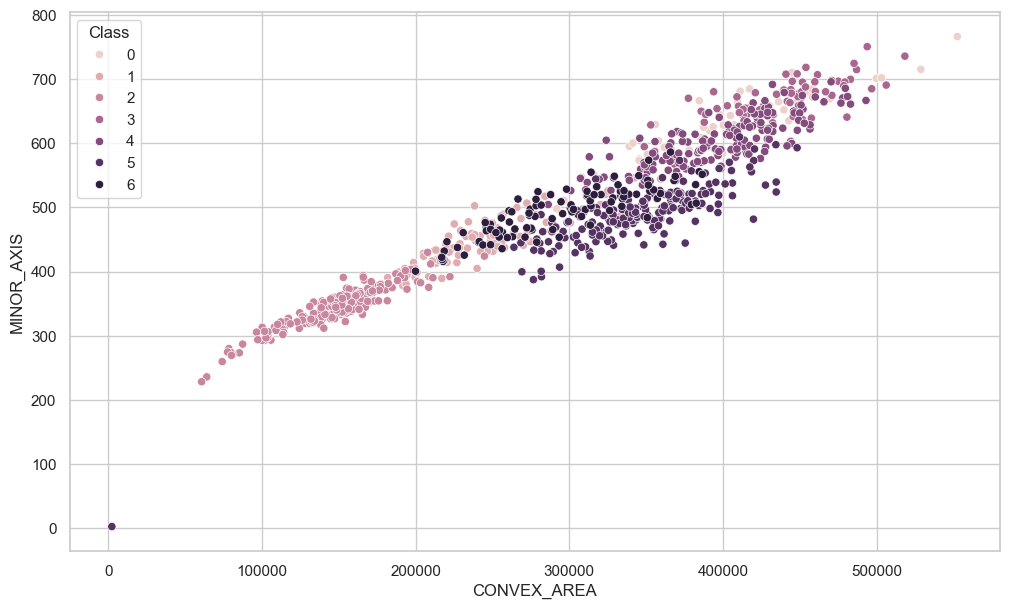

In [482]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="CONVEX_AREA" , y="MINOR_AXIS", hue='Class', data= date_fruit)

convex area vs major axis

<Axes: xlabel='CONVEX_AREA', ylabel='MAJOR_AXIS'>

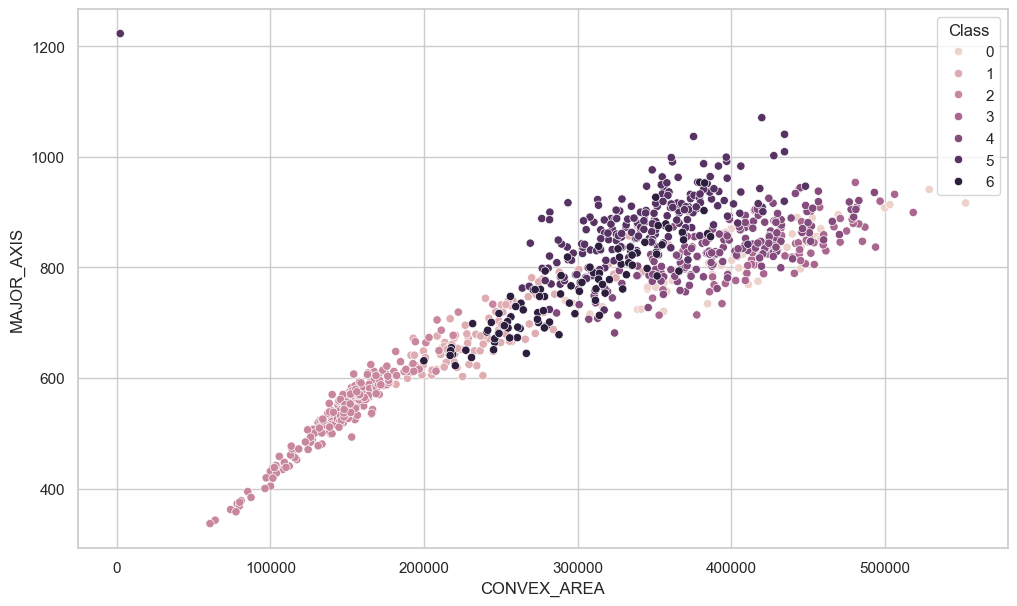

In [483]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="CONVEX_AREA" , y="MAJOR_AXIS", hue='Class', data= date_fruit)

convex area vs perimeter

<Axes: xlabel='CONVEX_AREA', ylabel='PERIMETER'>

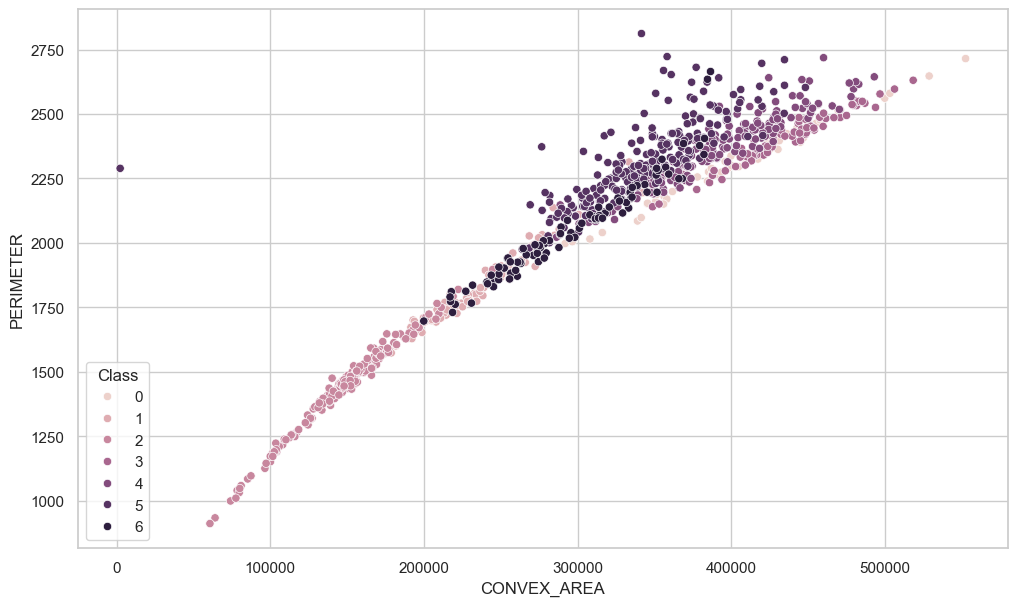

In [484]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="CONVEX_AREA" , y="PERIMETER", hue='Class', data= date_fruit)

Conclusion:-
1.normalization required.
2.scaling required.
3.feature removal required to control multicollinearity
4.outliers removal required.
5.i think we can remove this feature to minimize the multicollinearity:CONVEX_AREA, MINOR_AXIS, PERIMETER, EQDIASQ, SHAPEFACTOR_2, SHAPEFACTOR_3,ECCENTRICITY.

6.check  target class is Imbalance or not

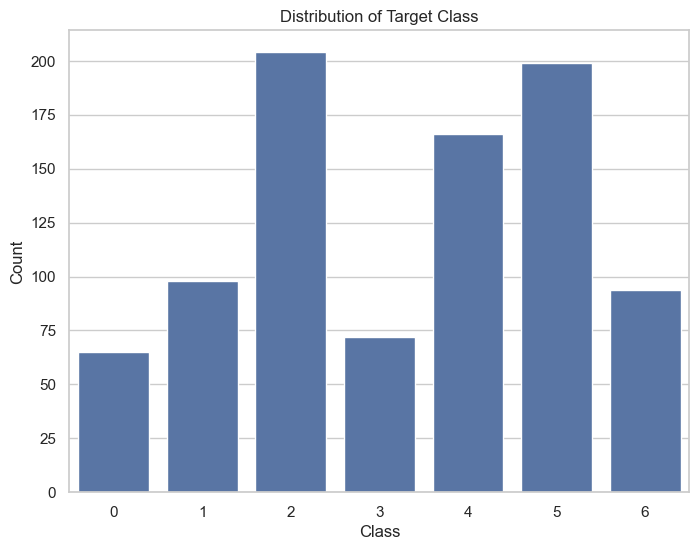

Class Distribution:
Class
2    204
5    199
4    166
1     98
6     94
3     72
0     65
Name: count, dtype: int64


In [485]:
class_distribution = date_fruit['Class'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=date_fruit)
plt.title('Distribution of Target Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("Class Distribution:")
print(class_distribution)

THis class is imbalance.this will automatically handled by catboost,xgboost,lightgbm or we will do it before manually it depends on results.

In [486]:
date_fruits1=date_fruit[['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class',
       'MeanCombined', 'KurtosisCombined', 'ALLdaub4Combined',
       'EntropyCombined', 'StdDevCombined']]

In [487]:
from sklearn.model_selection import train_test_split


X = date_fruits1.drop(columns=['Class'])  
y = date_fruits1['Class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)



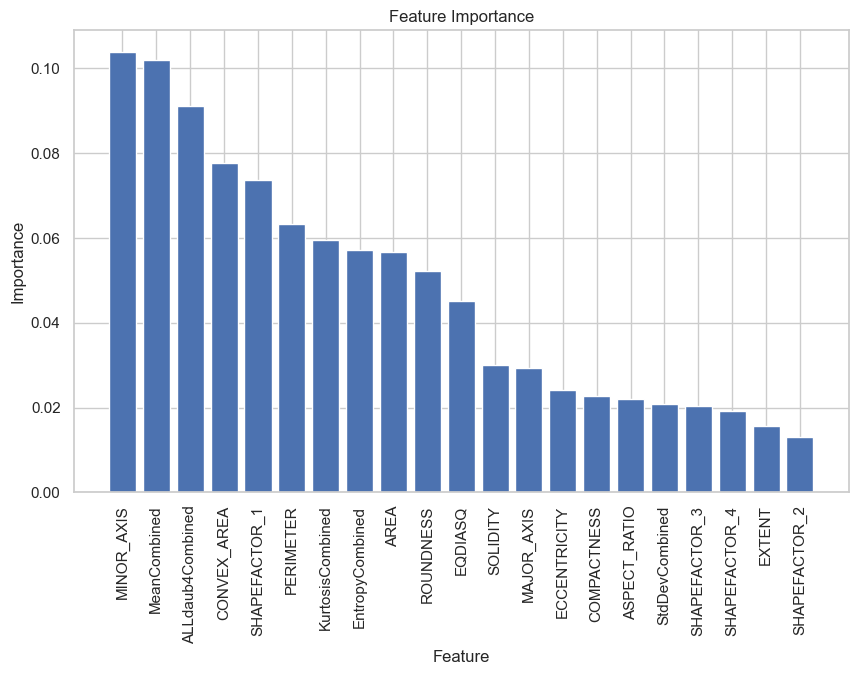

In [488]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [489]:
y_pred = rf_classifier.predict(X_test)

In [490]:
from sklearn.metrics import classification_report
accuracy = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.75      0.75      0.75        20
           2       0.97      0.95      0.96        41
           3       0.92      0.86      0.89        14
           4       0.91      0.97      0.94        33
           5       0.95      0.97      0.96        40
           6       0.71      0.63      0.67        19

    accuracy                           0.89       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.89      0.89      0.89       180



In [491]:
y_pred_=rf_classifier.predict(X_train)

In [492]:
accuracy_ = classification_report(y_train, y_pred_)
print("Accuracy:", accuracy_)

Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00       133
           5       1.00      1.00      1.00       159
           6       1.00      1.00      1.00        75

    accuracy                           1.00       718
   macro avg       1.00      1.00      1.00       718
weighted avg       1.00      1.00      1.00       718



In [493]:
date_fruits1.to_csv('date_fruits1.csv', index=False)

<Figure size 1000x600 with 0 Axes>

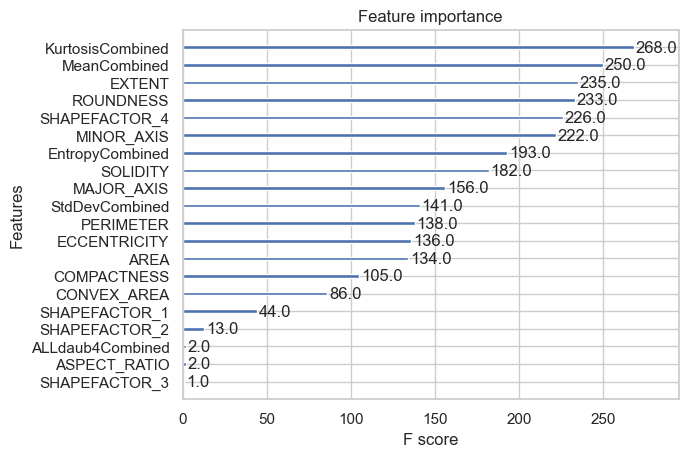

In [494]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
xgb_classifier = xgb.XGBClassifier(random_state=42)  
xgb_classifier.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
plot_importance(xgb_classifier)  
plt.show()


 we can remove this things CONVEX_AREA, EQDIASQ, SHAPEFACTOR_2, SHAPEFACTOR_3,ASPECT_RATIO this will also remove multicollinearity

In [495]:
y_pred2 = xgb_classifier.predict(X_test)
y_pred2_=xgb_classifier.predict(X_train)

In [496]:
accuracy2 = classification_report(y_test, y_pred2)
print("Accuracy:", accuracy2)
accuracy2_ = classification_report(y_train, y_pred2_)
print("Accuracy:", accuracy2_)

Accuracy:               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.71      0.75      0.73        20
           2       0.97      0.95      0.96        41
           3       0.87      0.93      0.90        14
           4       0.97      0.97      0.97        33
           5       0.95      0.97      0.96        40
           6       0.72      0.68      0.70        19

    accuracy                           0.90       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.90      0.90      0.90       180

Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00       133
           5       1.00      1.00      1.00       159
    

In [497]:
newdataset=pd.read_csv("date_fruits1.csv")

In [498]:
newdataset.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  SHAPEFACTOR_1  \
0    0.9947       424428  0.7831        1.2976  ...         0.0020   
1    0.9974       339014  0.7795        1.2161  ...         0.0021   
2    0.9962       528876  0.7657        1.3150  ...         0.0018   
3    0.9948       418255  0.7759        1.2831  ...         0.0020   
4    0.9908       350797  0.7569        1.3108  ...         0.0022   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  Class  MeanCombined  \
0         0.0015         0.7657         0.9936      0    107.677500   
1         0.0018         0.8218         0.9993      0    100.450067   
2         0.0014         0.7580         0.9968      0    117.800367   
3         0.0016         0.7727         0.9915      0     85.802667   
4         0.0017         0.7582         0.9938      0     97.565267   

   KurtosisCombined  ALLdaub4Combined  EntropyCombined  StdDevCombined  
0          3.474367         53.840300    -4.994262e+10       26.568967  
1          2.809400         50.224733    -3.439115e+10       26.294567  
2          4.110633         58.900333    -7.633259e+10       29.410167  
3          7.305167         42.901367    -3.123675e+10       27.871600  
4          3.364100         48.782967    -3.385143e+10       27.507900  

[5 rows x 22 columns]

In [499]:
columns_to_drop = ["CONVEX_AREA", "EQDIASQ", "SHAPEFACTOR_2", "SHAPEFACTOR_3", "ASPECT_RATIO"]
newdataset.drop(columns=columns_to_drop, inplace=True)


In [500]:
columns_to_drop = ["MINOR_AXIS"]
newdataset.drop(columns=columns_to_drop, inplace=True)

In [501]:
corr1=newdataset.corr()

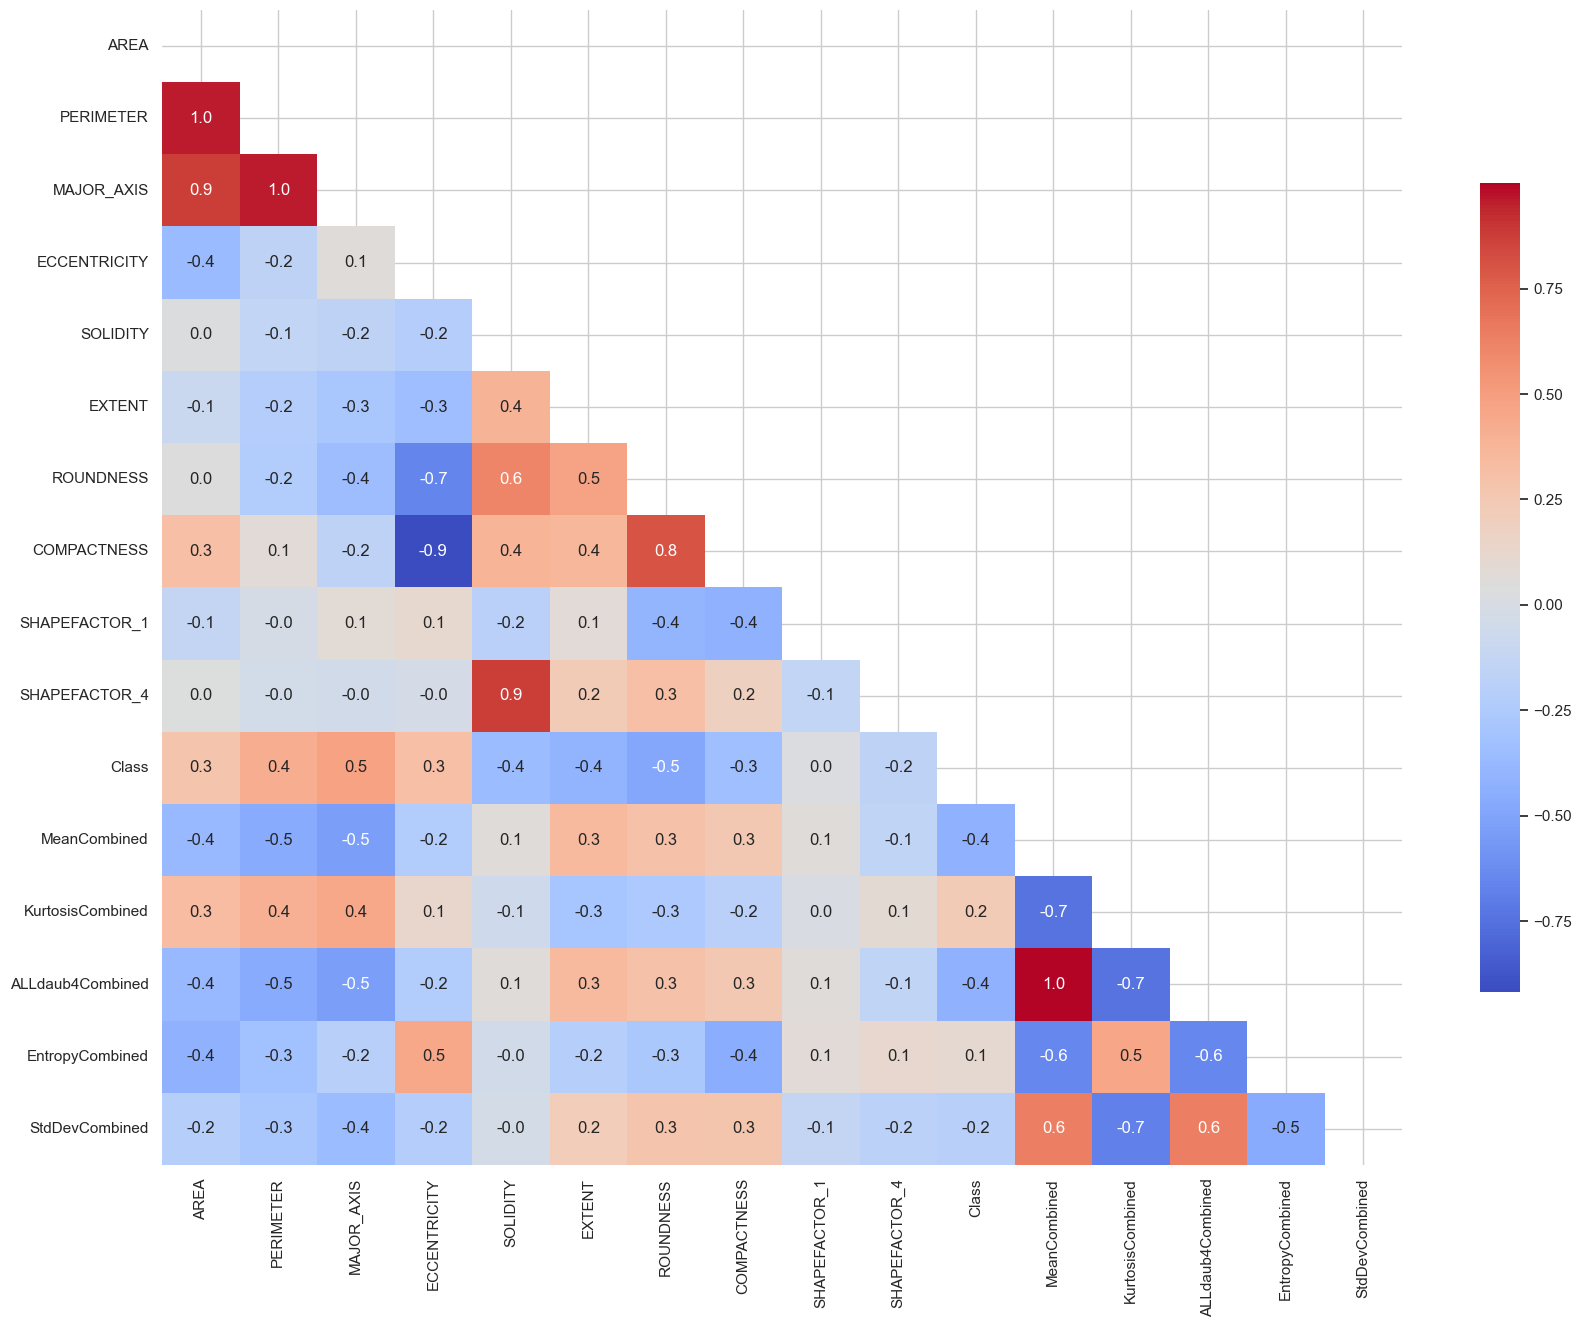

In [502]:
mask = np.triu(np.ones_like(corr1, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(corr1, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'shrink': .7})

plt.show()

In [504]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.077801
0:	learn: 1.7250439	total: 81.9ms	remaining: 1m 21s
1:	learn: 1.5676083	total: 92.8ms	remaining: 46.3s
2:	learn: 1.4414085	total: 109ms	remaining: 36.3s
3:	learn: 1.3394081	total: 148ms	remaining: 36.9s
4:	learn: 1.2483076	total: 174ms	remaining: 34.7s
5:	learn: 1.1676746	total: 210ms	remaining: 34.8s
6:	learn: 1.0932410	total: 277ms	remaining: 39.3s
7:	learn: 1.0373266	total: 304ms	remaining: 37.7s
8:	learn: 0.9849416	total: 321ms	remaining: 35.4s
9:	learn: 0.9372511	total: 345ms	remaining: 34.2s
10:	learn: 0.8935984	total: 351ms	remaining: 31.6s
11:	learn: 0.8542442	total: 359ms	remaining: 29.6s
12:	learn: 0.8152797	total: 365ms	remaining: 27.7s
13:	learn: 0.7828559	total: 370ms	remaining: 26.1s
14:	learn: 0.7515541	total: 376ms	remaining: 24.7s
15:	learn: 0.7224863	total: 380ms	remaining: 23.4s
16:	learn: 0.6970142	total: 385ms	remaining: 22.2s
17:	learn: 0.6744538	total: 389ms	remaining: 21.2s
18:	learn: 0.6507362	total: 394ms	remaining: 20.3s
19:	lear

50:	learn: 0.3331353	total: 611ms	remaining: 11.4s
51:	learn: 0.3293247	total: 616ms	remaining: 11.2s
52:	learn: 0.3248578	total: 622ms	remaining: 11.1s
53:	learn: 0.3220234	total: 628ms	remaining: 11s
54:	learn: 0.3185660	total: 635ms	remaining: 10.9s
55:	learn: 0.3147493	total: 642ms	remaining: 10.8s
56:	learn: 0.3109179	total: 648ms	remaining: 10.7s
57:	learn: 0.3074445	total: 656ms	remaining: 10.7s
58:	learn: 0.3039391	total: 663ms	remaining: 10.6s
59:	learn: 0.2999183	total: 671ms	remaining: 10.5s
60:	learn: 0.2974886	total: 680ms	remaining: 10.5s
61:	learn: 0.2944862	total: 688ms	remaining: 10.4s
62:	learn: 0.2911696	total: 695ms	remaining: 10.3s
63:	learn: 0.2886504	total: 701ms	remaining: 10.3s
64:	learn: 0.2843799	total: 708ms	remaining: 10.2s
65:	learn: 0.2817646	total: 713ms	remaining: 10.1s
66:	learn: 0.2790021	total: 718ms	remaining: 10s
67:	learn: 0.2768086	total: 725ms	remaining: 9.93s
68:	learn: 0.2744570	total: 732ms	remaining: 9.88s
69:	learn: 0.2718289	total: 739ms	r

In [505]:
y_pred_cat = model.predict(X_test)


In [506]:
print(classification_report(y_pred_cat,y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.75      0.79      0.77        19
           2       0.95      0.97      0.96        40
           3       0.71      0.83      0.77        12
           4       1.00      0.94      0.97        35
           5       0.97      0.89      0.93        44
           6       0.68      0.76      0.72        17

    accuracy                           0.89       180
   macro avg       0.85      0.86      0.85       180
weighted avg       0.90      0.89      0.89       180



In [509]:
from sklearn.model_selection import GridSearchCV
model_cat = CatBoostClassifier(loss_function='MultiClass', verbose=0)
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}


In [510]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_cat, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.3s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.3s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.3s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.4s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.4s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.4s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.3s
[CV] END border_count=32, depth=4, iterations=100, l2_leaf

In [ ]:
best_model = grid_search.best_estimator_

y_pred_cat_tune = best_model.predict(X_test)
report = classification_report(y_test, y_pred_cat_tune)
print(f'Classification Report:\n{report}')